In [1]:
import pandas as pd
import seaborn
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import OptimizeWarning
import warnings

import decomposition
import potential_data
import scaler
import plots
import potential_analyze
import fit
import functional

pd.options.mode.chained_assignment = None
warnings.simplefilter("ignore", OptimizeWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [2]:
def save_sigma_csv(df_fit):
    df_fit_out = df_fit.reset_index(level=['beta'])[['beta', 'sigma']]
    df_fit_out['sigma'] = df_fit_out['sigma'].map('{:.4f}'.format)
    try:
        os.makedirs('../../data/potential/su3/gluodynamics')
    except:
        pass
    df_fit_out.to_csv('../../data/potential/su3/gluodynamics/fit_data_beta.csv', index=False)

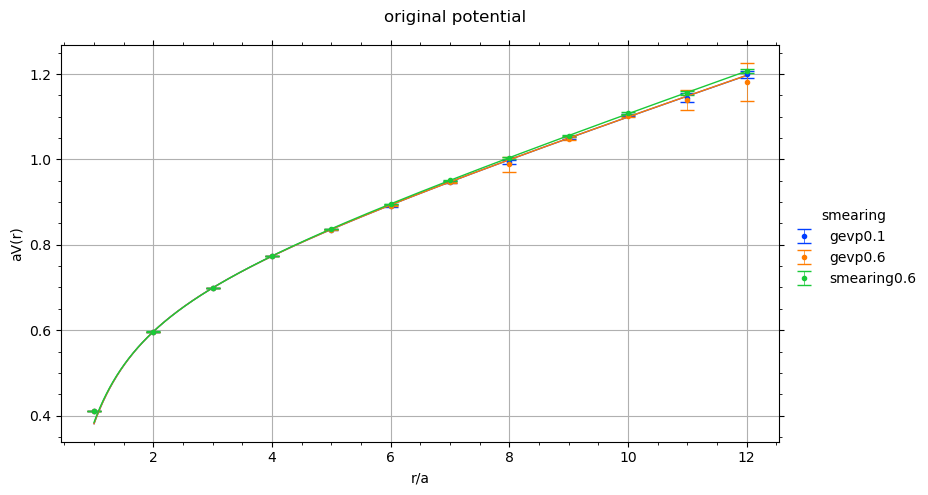

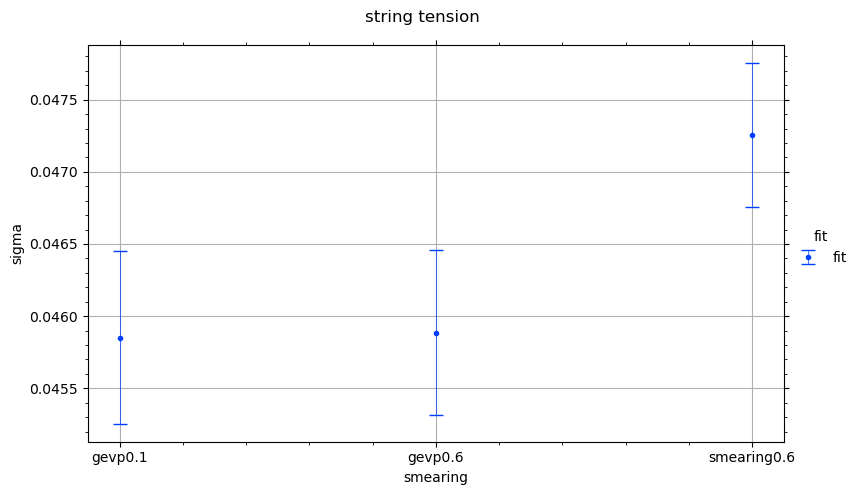

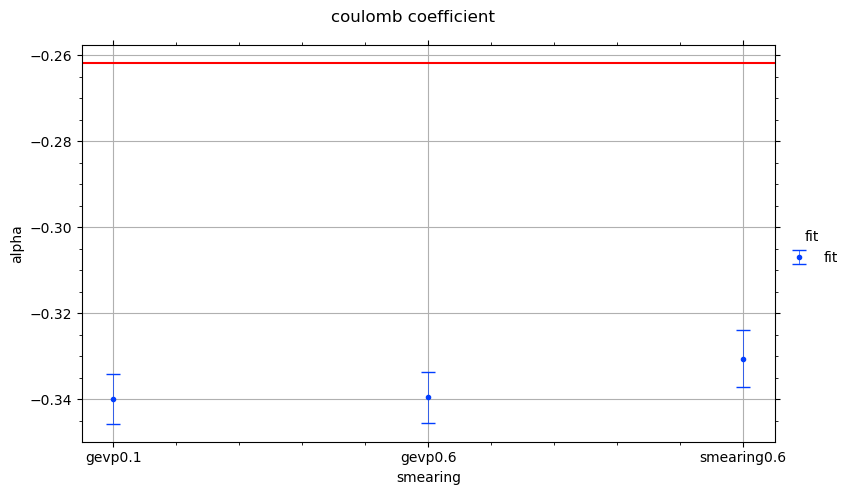

In [57]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'smearing'
groupby = []
paths1 = [{'path': '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/original/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'smearing': 'gevp0.6'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/original/HYP0_alpha=1_1_0.5_APE_alpha=0.1/potential.csv',
          'parameters': {'smearing': 'gevp0.1'}}]
paths2 = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'smearing': 'smearing0.6'}, 'constraints': {'smearing_step': (301, 301)}}]
image_path = f'../../images/potential/su3/gluodynamics/24^4'
image_name = f'smearing_dependence'
df1 = potential_data.get_potantial_df(paths1, coluns_to_multiindex=['smearing'])
df1 = df1.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df2 = potential_data.get_potantial_df(paths2, coluns_to_multiindex=['smearing'])
# df2 = df2.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df2 = df2.drop('smearing_step', axis = 1)
df = pd.concat([df1, df2])
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='smearing')
df_curves = df_curves.reset_index(level='smearing')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'smearing': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='smearing')
plots.plot_potential_single(df_fit, 'smearing', 'sigma', 'fit', 'smearing', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'smearing', 'alpha', 'fit', 'smearing', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

             r/a   T     aV(r)       err
temperature                             
160.168019     1   2  0.043518  0.000005
160.168019     1   3  0.042921  0.000006
160.168019     1   4  0.042705  0.000006
160.168019     1   5  0.042612  0.000006
160.168019     1   6  0.042565  0.000007
...          ...  ..       ...       ...
112.117614    16  15  0.441458  0.060002
112.117614    16  16  0.534638  0.090082
112.117614    16  17  0.162182  4.545999
112.117614    16  18 -0.776922  5.294331
112.117614    16  19  1.958992  7.510773

[960 rows x 4 columns]


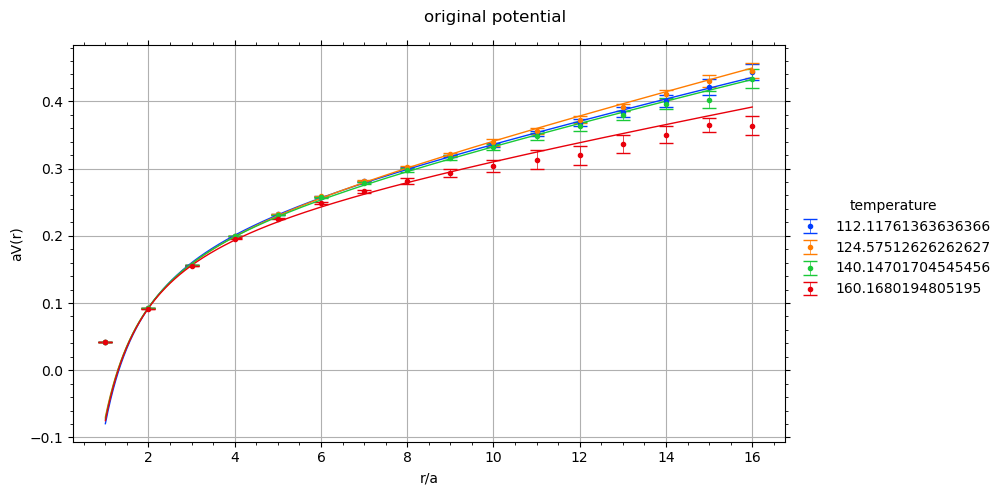

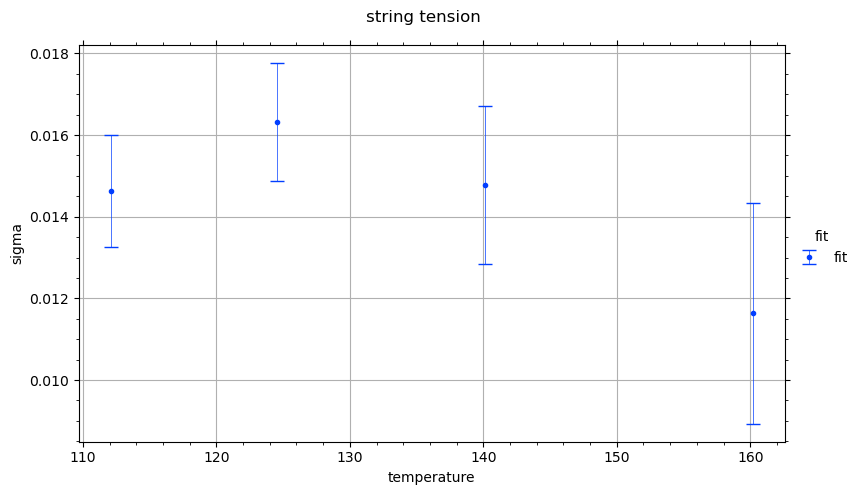

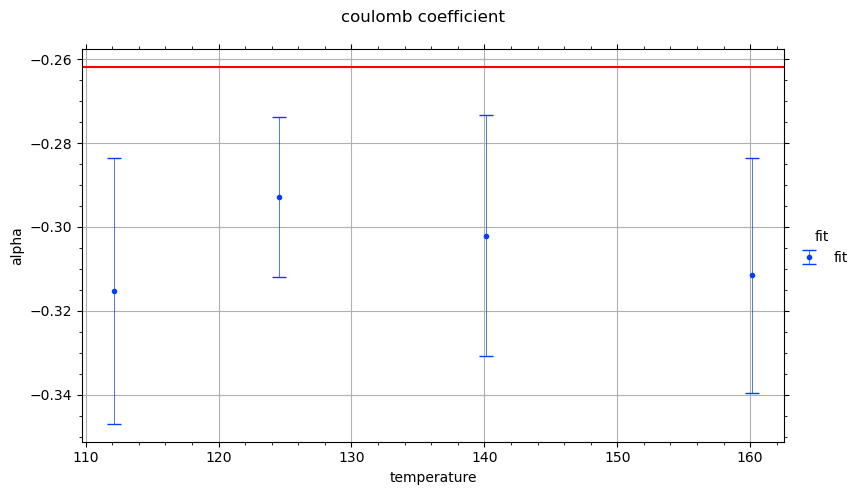

In [12]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'temperature'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/28/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x32/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/32/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/36/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/40/a}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['temperature'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
print(df)
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='temperature')
df_curves = df_curves.reset_index(level='temperature')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'temperature': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='temperature')
plots.plot_potential_single(df_fit, 'temperature', 'sigma', 'fit', 'temperature', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'temperature', 'alpha', 'fit', 'temperature', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

             r/a   T     aV(r)       err
temperature                             
280.3          1   2  0.043375  0.000007
280.3          1   3  0.042759  0.000007
280.3          1   4  0.042527  0.000008
280.3          1   5  0.042416  0.000008
280.3          1   6  0.042357  0.000008
...          ...  ..       ...       ...
112.117614    16  15  1.680398  2.956060
112.117614    16  16  1.370444  2.875270
112.117614    16  17 -1.975991  1.727568
112.117614    16  18 -0.419301  2.101320
112.117614    16  19  3.040275  1.735032

[1344 rows x 4 columns]


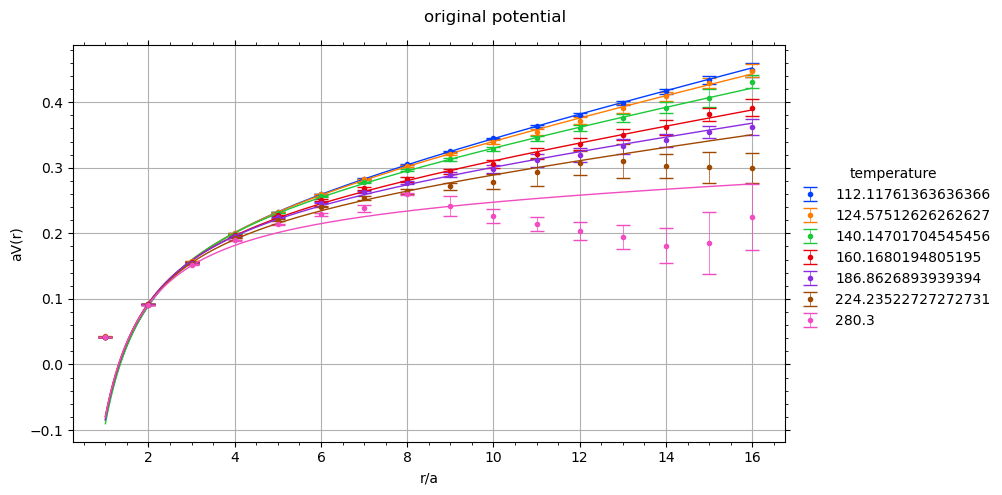

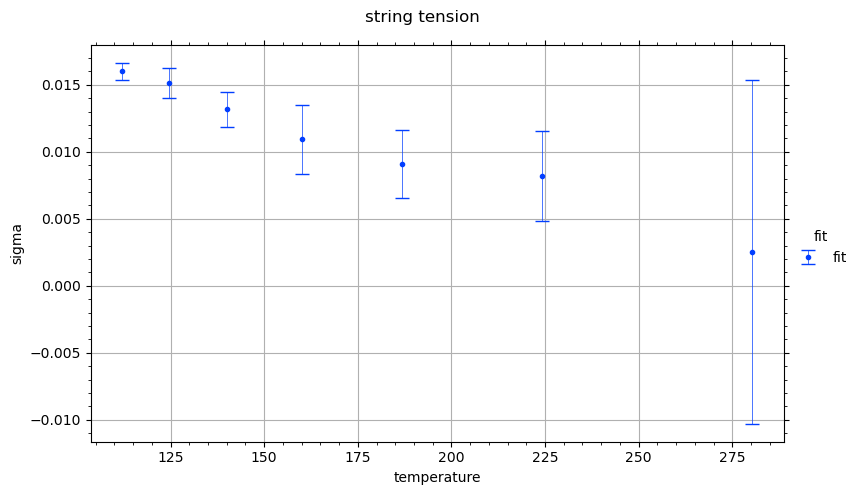

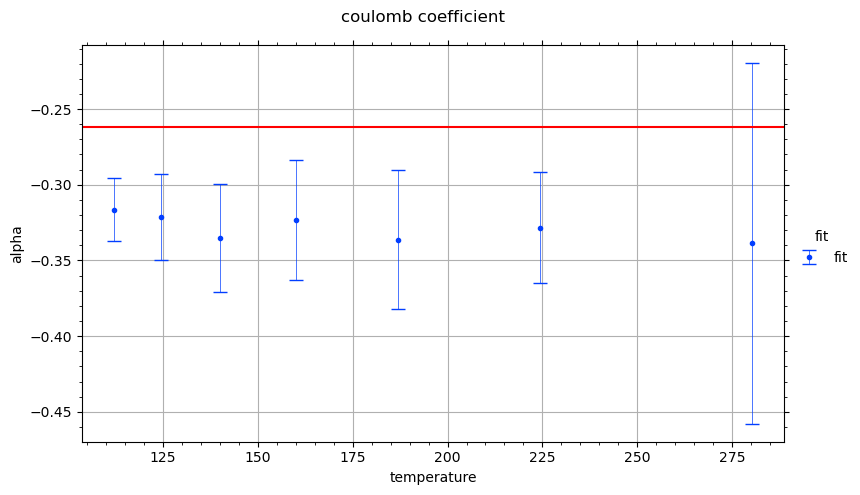

In [11]:
show_plot = True
fm_to_GeV = 1/0.197327
a = 0.044 * fm_to_GeV / 1000
coordinate = 'r/a'
hue = 'temperature'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x16/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': f'{1/16/a:.1f}'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x20/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/20/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x24/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/24/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/28/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x32/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/32/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/36/a}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'temperature': 1/40/a}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['temperature'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
print(df)
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='temperature')
df_curves = df_curves.reset_index(level='temperature')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'temperature': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='temperature')
plots.plot_potential_single(df_fit, 'temperature', 'sigma', 'fit', 'temperature', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'temperature', 'alpha', 'fit', 'temperature', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

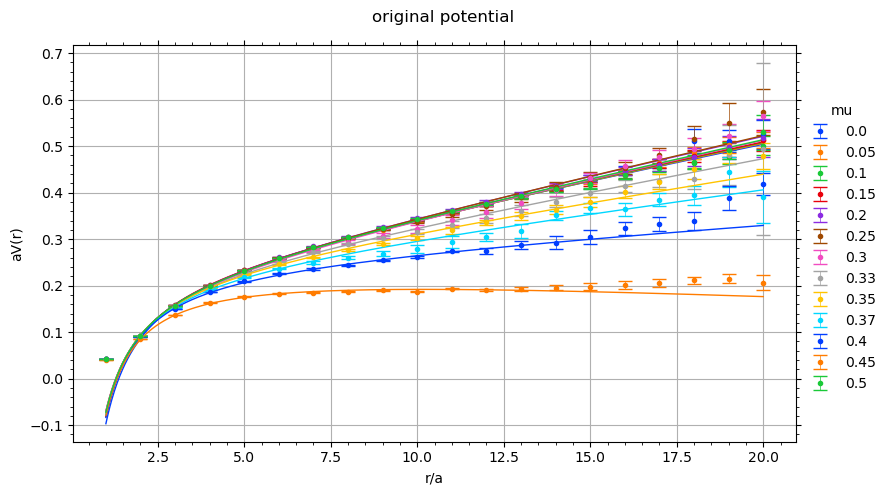

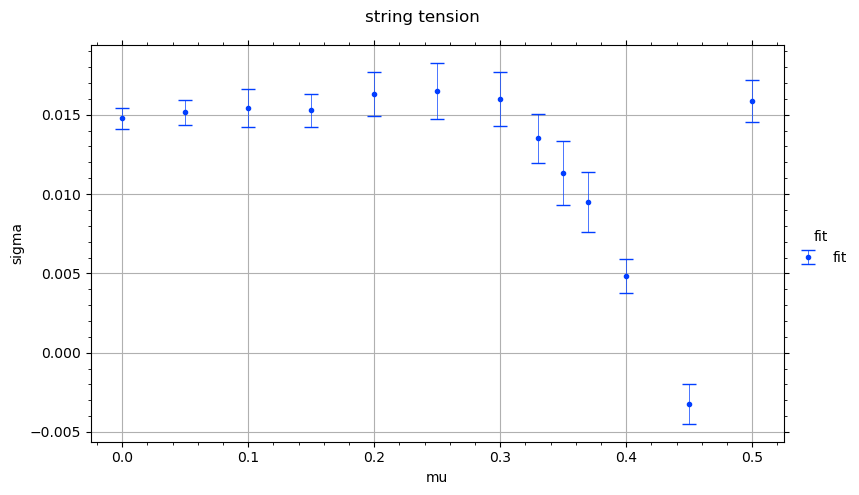

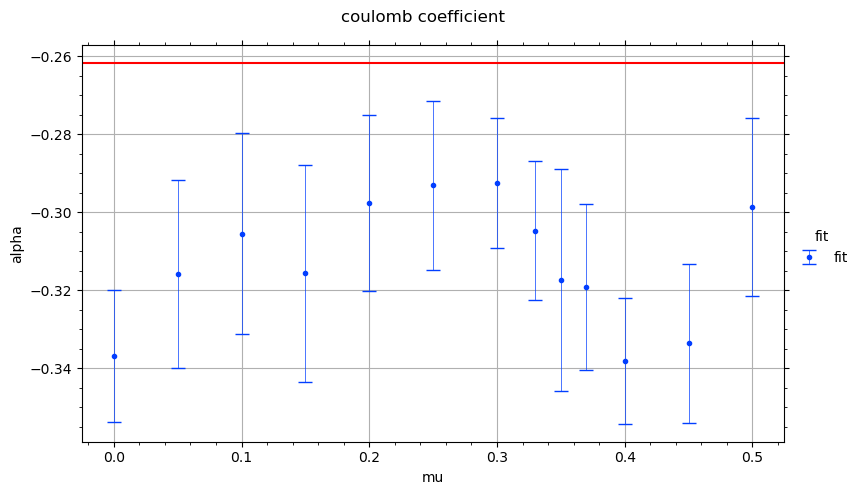

In [4]:
show_plot = True
coordinate = 'r/a'
hue = 'mu'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.00/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.05/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.05}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.10/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.10}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.15}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.20}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.25/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.25}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.30/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.3}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.33/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.33}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.35/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.35}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.37/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.37}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.40/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.4}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.45/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.45}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/40^4/mu0.50/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'mu': 0.5}}]
image_path = f'../../images/potential/su2/qc2dstag/40^4'
image_name = f'mu_dependence'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['mu'])
df = df.rename({'time_size': 'T', 'space_size': 'r/a', 'potential': 'aV(r)'}, axis=1)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 9, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=10, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='mu')
df_curves = df_curves.reset_index(level='mu')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'mu': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='mu')
plots.plot_potential_single(df_fit, 'mu', 'sigma', 'fit', 'mu', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
plots.plot_potential_single(df_fit, 'mu', 'alpha', 'fit', 'mu', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                               r/a  T     aV(r)       err
params        beta functional                            
16^4, beta6.0 6.0  0.271042      1  2  0.021619  0.000510
                   0.271042      1  3  0.022315  0.000529
                   0.271042      1  4  0.022899  0.000539
                   0.271042      1  5  0.023366  0.000550
                   0.271042      1  6  0.023779  0.000584
...                            ... ..       ...       ...
                   0.264460      8  3  0.156601  0.006365
                   0.264460      8  4  0.165512  0.007545
                   0.264460      8  5  0.174390  0.008349
                   0.264460      8  6  0.182665  0.009924
                   0.264460      8  7  0.189736  0.011441

[6384 rows x 4 columns]
                               r/a     T     aV(r)       err
params        beta functional                               
16^4, beta6.0 6.0  0.264460      1  None  0.014475  0.005244
                   0.264460      2  No

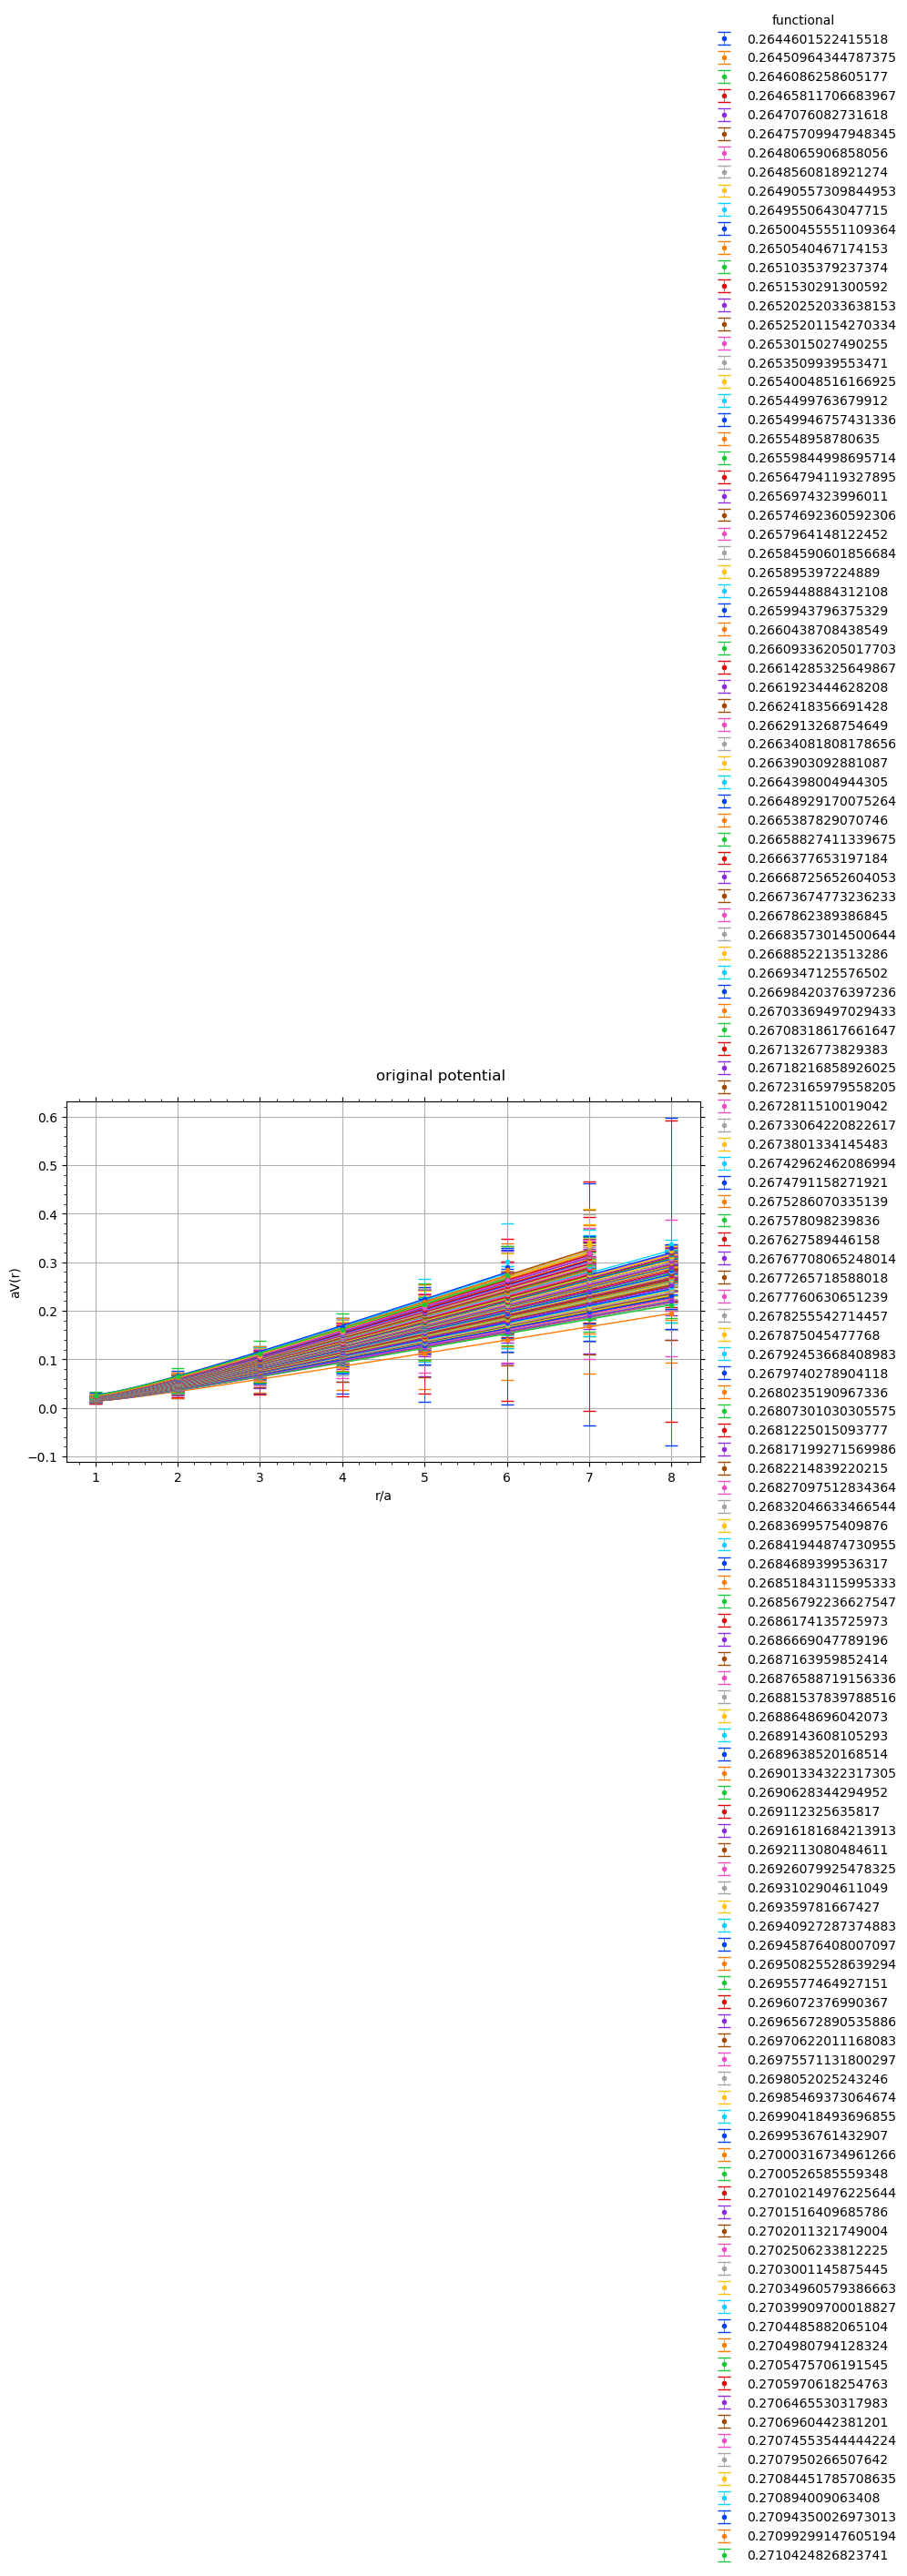

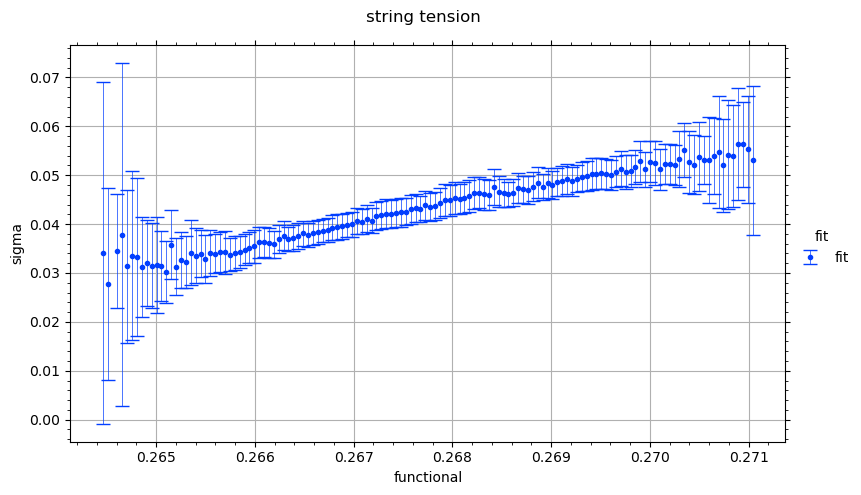

In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'functional'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/monopole/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=100/potential_bin.csv',
          'parameters': {'params': '16^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
df['functional'] = (1 - df['functional']) * 3/2
df = df.set_index('functional', append=True)
print(df)
# print(df[df['aV(r)'].isna()])
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
print(df_fit)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', 'functional', 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level=['beta', 'functional'])
plots.plot_potential_single(df_fit, 'functional', 'sigma', 'fit', 'functional', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

In [11]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/32^4/beta6.0/photon/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential.csv',
          'parameters': {'params': '32^4, beta6.0', 'beta': 6.0}, 'constraints': {'space_size': (1, 4)}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 6, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level=['beta', 'params'])
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'params', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a   T     aV(r)       err
params        beta                             
32^4, beta6.0 6.0     1   2  0.409755  0.002198
              6.0     1   3  0.396330  0.003279
              6.0     1   4  0.376633  0.004780
              6.0     1   5  0.348680  0.006694
              6.0     1   6  0.310875  0.008790
              6.0     1   7  0.263754  0.010486
              6.0     1   8  0.210957  0.011067
              6.0     1   9  0.159121  0.010229
              6.0     1  10  0.114113  0.008423
              6.0     1  11  0.078672  0.006330
              6.0     1  12  0.053140  0.004493
              6.0     1  13  0.035077  0.003063
              6.0     1  14  0.022859  0.002033
              6.0     1  15  0.014735  0.001345
              6.0     2   2  0.543335  0.005164
              6.0     2   3  0.490479  0.010000
              6.0     2   4  0.396046  0.016684
              6.0     2   5  0.267348  0.019136
              6.0     2   6  0.150969  0

ValueError: No objects to concatenate

                    r/a   T     aV(r)       err
params        beta                             
32^4, beta6.0 6.0     1   2  0.555069  0.000020
              6.0     1   3  0.547997  0.000025
              6.0     1   4  0.545113  0.000031
              6.0     1   5  0.543960  0.000044
              6.0     1   6  0.543461  0.000064
...                 ...  ..       ...       ...
              6.0    16  11 -1.060043  1.813208
              6.0    16  12  1.404715  1.887433
              6.0    16  13  1.692562  1.694538
              6.0    16  14 -3.735355  0.518866
              6.0    16  15  0.837304  1.467508

[224 rows x 4 columns]
                    r/a     T     aV(r)       err
params        beta                               
32^4, beta6.0 6.0     1  None  0.543147  0.000073
              6.0     2  None  0.671490  0.000303
              6.0     3  None  0.710083  0.000675
              6.0     4  None  0.726458  0.001234
              6.0     5  None  0.734073  0.001408
  

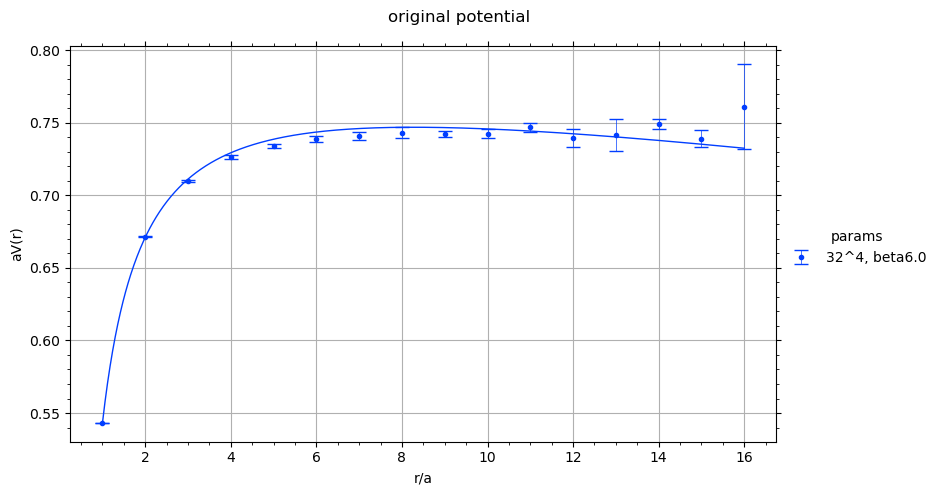

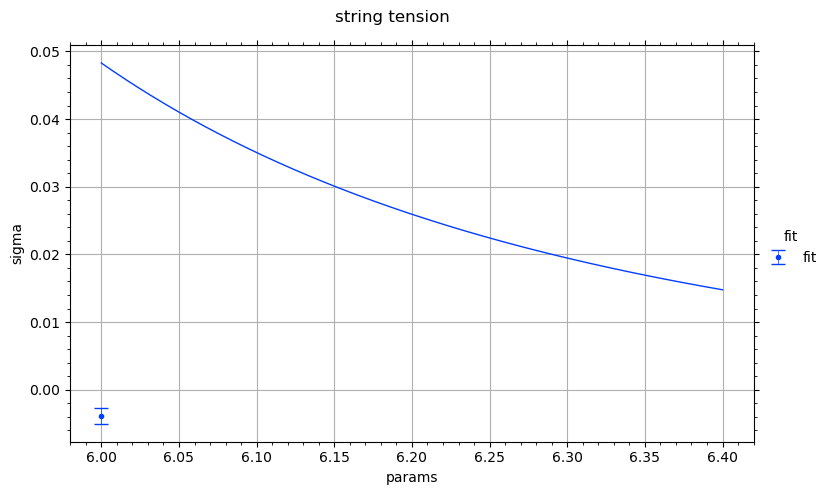

In [ ]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/32^4/beta6.0/offdiagonal/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential.csv',
          'parameters': {'params': '32^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 6, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a   T      aV(r)        err
params        beta                               
32^4, beta6.0 6.0     1   2   0.897984   0.000027
              6.0     1   3   0.893349   0.000043
              6.0     1   4   0.891208   0.000085
              6.0     1   5   0.890508   0.000200
              6.0     1   6   0.889916   0.000468
...                 ...  ..        ...        ...
              6.0    16  11  -0.133237   1.932701
              6.0    16  12  -0.384191   3.449579
              6.0    16  13   0.584291   6.915472
              6.0    16  14 -17.802498  83.381290
              6.0    16  15   0.564348   1.800063

[224 rows x 4 columns]
                    r/a     T     aV(r)       err
params        beta                               
32^4, beta6.0 6.0     1  None  0.889600  0.000283
              6.0     2  None  1.216533  0.010552
              6.0     3  None  1.167881  0.221556
              6.0     4  None  1.259550  0.236561
              6.0     5  N

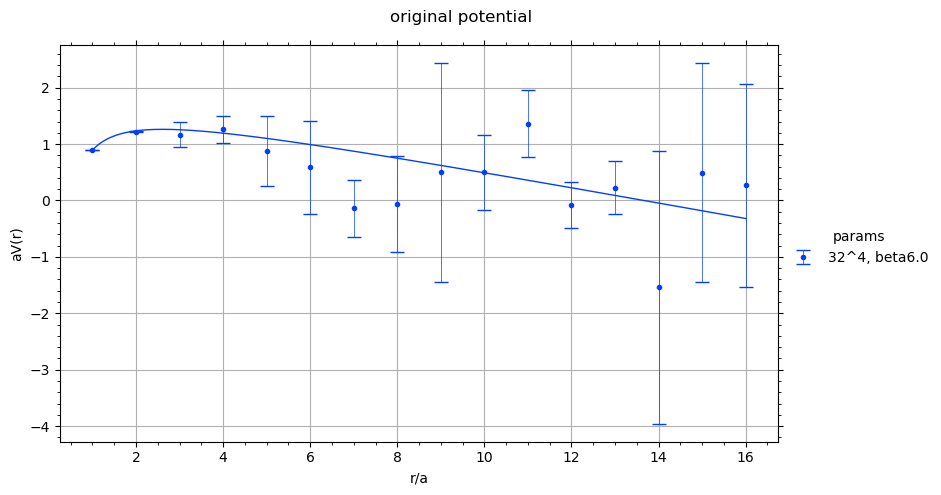

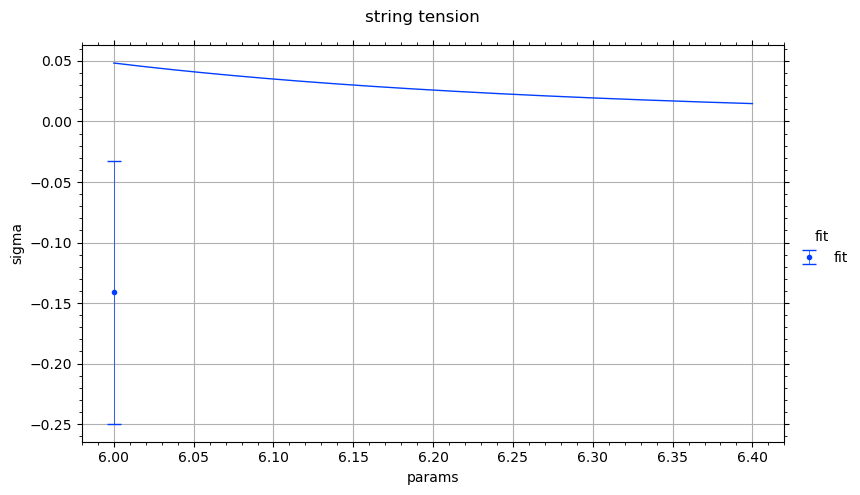

In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/32^4/beta6.0/monopoless/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential.csv',
          'parameters': {'params': '32^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 6, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a   T     aV(r)       err
params        beta                             
32^4, beta6.0 6.0     1   2  0.035704  0.000029
              6.0     1   3  0.037008  0.000030
              6.0     1   4  0.037986  0.000031
              6.0     1   5  0.038722  0.000032
              6.0     1   6  0.039268  0.000032
...                 ...  ..       ...       ...
              6.0    16  11 -0.135599  1.015743
              6.0    16  12  0.015850  0.358735
              6.0    16  13  0.229229  0.482699
              6.0    16  14 -0.462628  0.536032
              6.0    16  15  0.423427  0.560067

[224 rows x 4 columns]
                    r/a     T     aV(r)       err
params        beta                               
32^4, beta6.0 6.0     1  None  0.040749  0.000044
              6.0     2  None  0.095580  0.000106
              6.0     3  None  0.156338  0.000206
              6.0     4  None  0.221979  0.000348
              6.0     5  None  0.291450  0.000774
  

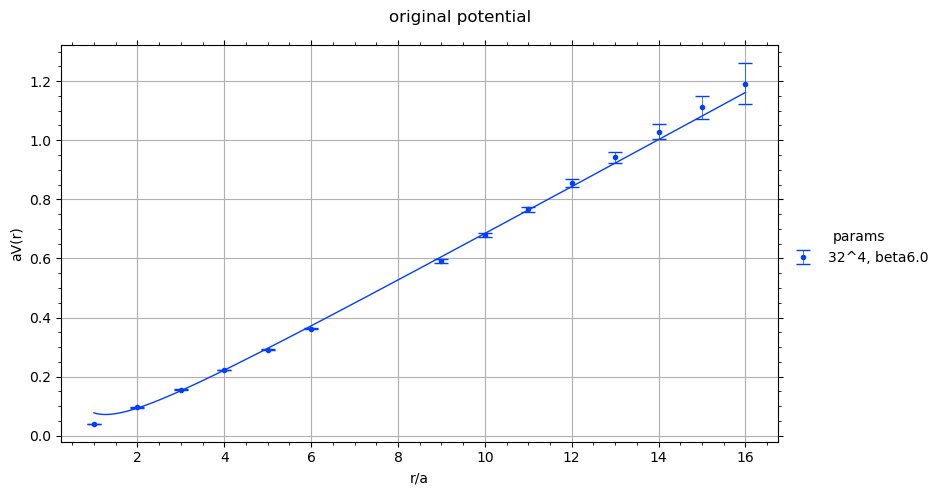

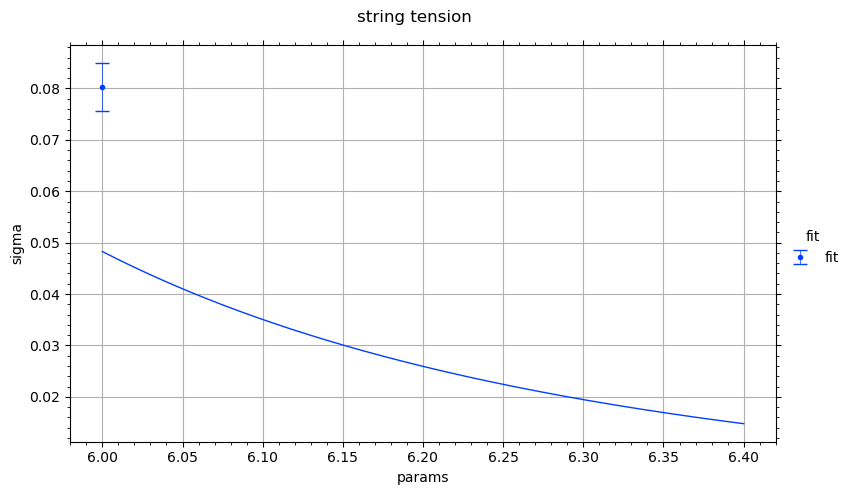

In [8]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/32^4/beta6.0/monopole/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential.csv',
          'parameters': {'params': '32^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a  T     aV(r)       err
params        beta                            
16^4, beta6.0 6.0     1  2  0.461691  0.000202
              6.0     1  3  0.461940  0.000225
              6.0     1  4  0.461807  0.000259
              6.0     1  5  0.462273  0.000319
              6.0     1  6  0.462365  0.000437
              6.0     1  7  0.461332  0.000607
              6.0     2  2  0.672832  0.000465
              6.0     2  3  0.674204  0.000530
              6.0     2  4  0.674719  0.000669
              6.0     2  5  0.674304  0.001034
              6.0     2  6  0.675311  0.001791
              6.0     2  7  0.673239  0.003254
              6.0     3  2  0.804703  0.000772
              6.0     3  3  0.807936  0.000894
              6.0     3  4  0.809949  0.001234
              6.0     3  5  0.812127  0.002122
              6.0     3  6  0.810282  0.004578
              6.0     3  7  0.811363  0.009978
              6.0     4  2  0.909601  0.001097
             

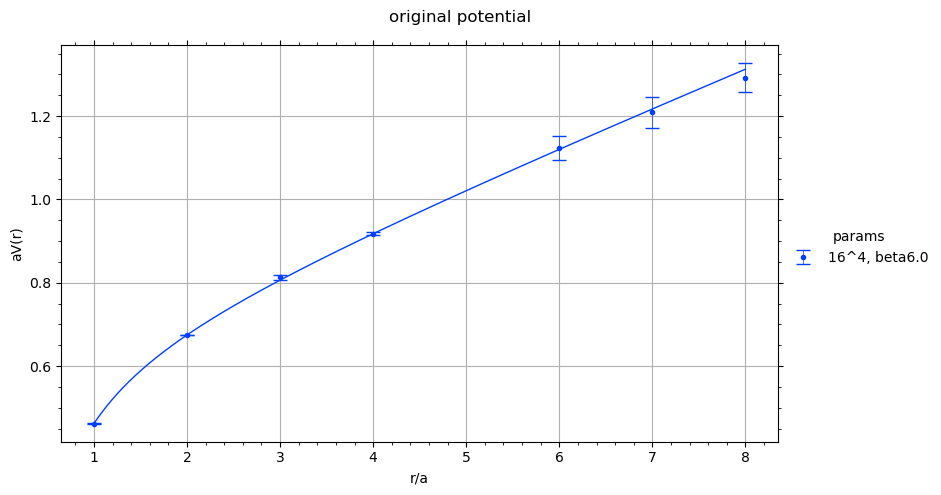

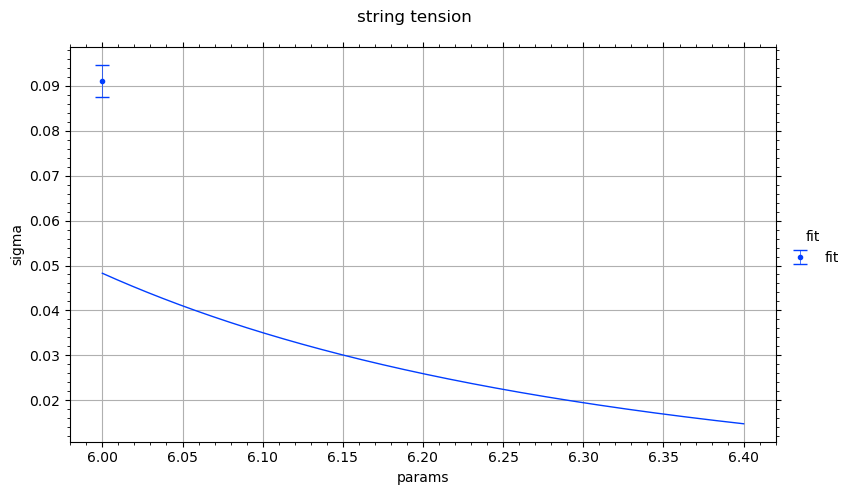

In [9]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/16^4/beta6.0/abelian/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential.csv',
          'parameters': {'params': '16^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a  T     aV(r)       err
params        beta                            
16^4, beta6.0 6.0     1  2  0.119525  0.000048
              6.0     1  3  0.117867  0.000049
              6.0     1  4  0.117314  0.000050
              6.0     1  5  0.117099  0.000052
              6.0     1  6  0.117019  0.000052
              6.0     1  7  0.116969  0.000054
              6.0     2  2  0.269286  0.000142
              6.0     2  3  0.263760  0.000149
              6.0     2  4  0.261541  0.000155
              6.0     2  5  0.260549  0.000163
              6.0     2  6  0.260144  0.000171
              6.0     2  7  0.259849  0.000185
              6.0     3  2  0.479424  0.000297
              6.0     3  3  0.467885  0.000330
              6.0     3  4  0.462669  0.000372
              6.0     3  5  0.459973  0.000449
              6.0     3  6  0.459087  0.000583
              6.0     3  7  0.458214  0.000827
              6.0     4  2  0.645551  0.000485
             

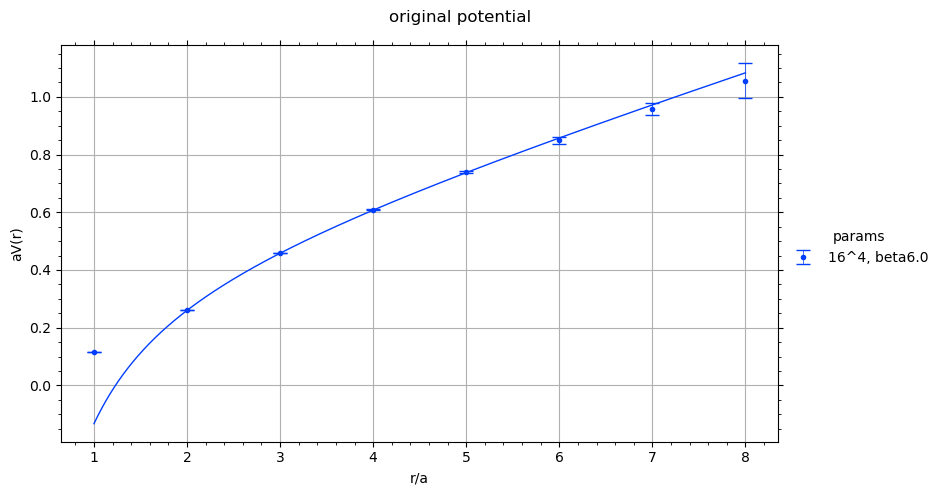

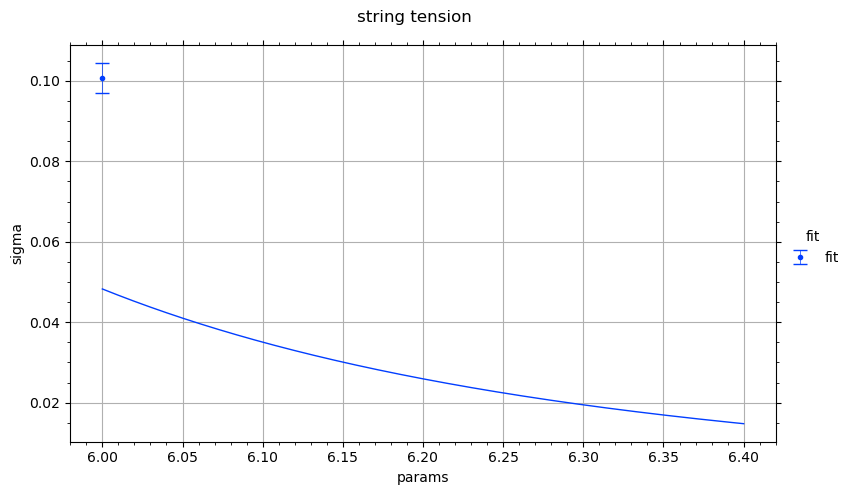

In [20]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/16^4/beta6.0/original/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential.csv',
          'parameters': {'params': '16^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a  T     aV(r)       err
params        beta                            
16^4, beta6.0 6.0     1  2  0.118659  0.000048
              6.0     1  3  0.117552  0.000049
              6.0     1  4  0.117186  0.000050
              6.0     1  5  0.117046  0.000051
              6.0     1  6  0.116992  0.000052
              6.0     1  7  0.116958  0.000054
              6.0     2  2  0.266006  0.000142
              6.0     2  3  0.262393  0.000149
              6.0     2  4  0.260929  0.000154
              6.0     2  5  0.260268  0.000162
              6.0     2  6  0.259992  0.000169
              6.0     2  7  0.259775  0.000183
              6.0     3  2  0.472183  0.000294
              6.0     3  3  0.464421  0.000327
              6.0     3  4  0.460908  0.000367
              6.0     3  5  0.459070  0.000437
              6.0     3  6  0.458524  0.000560
              6.0     3  7  0.457931  0.000789
              6.0     4  2  0.633924  0.000480
             

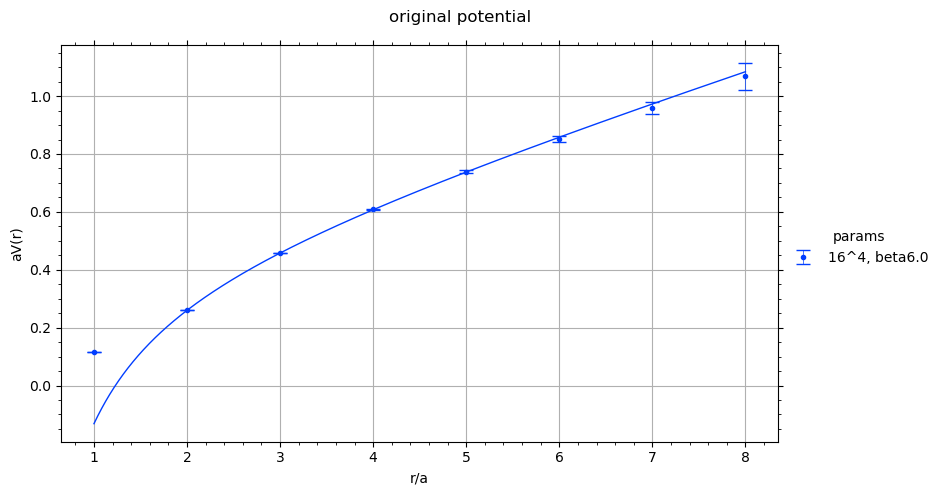

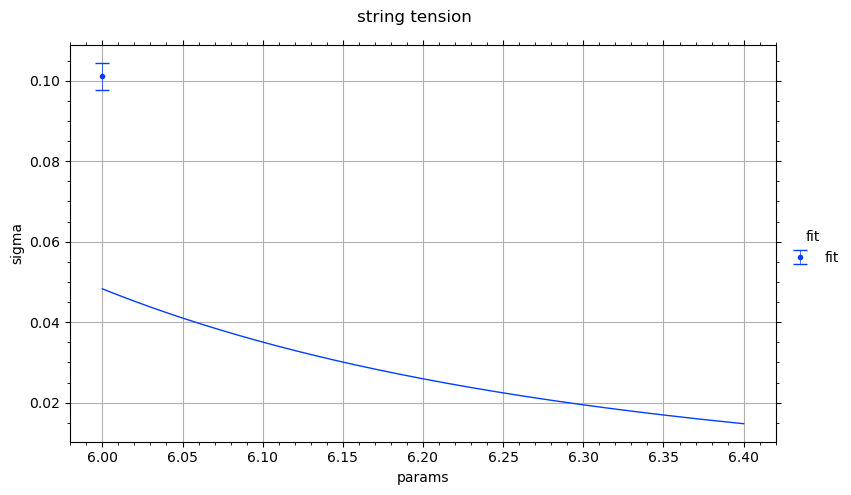

In [21]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/16^4/beta6.0/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '16^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a   T     aV(r)       err
params        beta                             
32^4, beta6.0 6.0     1   2  0.439888  0.004907
              6.0     1   3  0.427361  0.007583
              6.0     1   4  0.407881  0.011473
              6.0     1   5  0.378891  0.016725
              6.0     1   6  0.338126  0.022805
...                 ...  ..       ...       ...
              6.0    16  11 -0.000394  0.000653
              6.0    16  12 -0.000604  0.000665
              6.0    16  13  0.001036  0.000678
              6.0    16  14 -0.001397  0.000698
              6.0    16  15  0.001293  0.000806

[224 rows x 4 columns]
                    r/a     T     aV(r)       err
params        beta                               
32^4, beta6.0 6.0     1  None -0.223402  0.149771
              6.0     2  None -0.003055  0.002654
              6.0     3  None  0.000207  0.000598
              6.0     4  None  0.000250  0.000461
              6.0     5  None  0.000016  0.000414
  

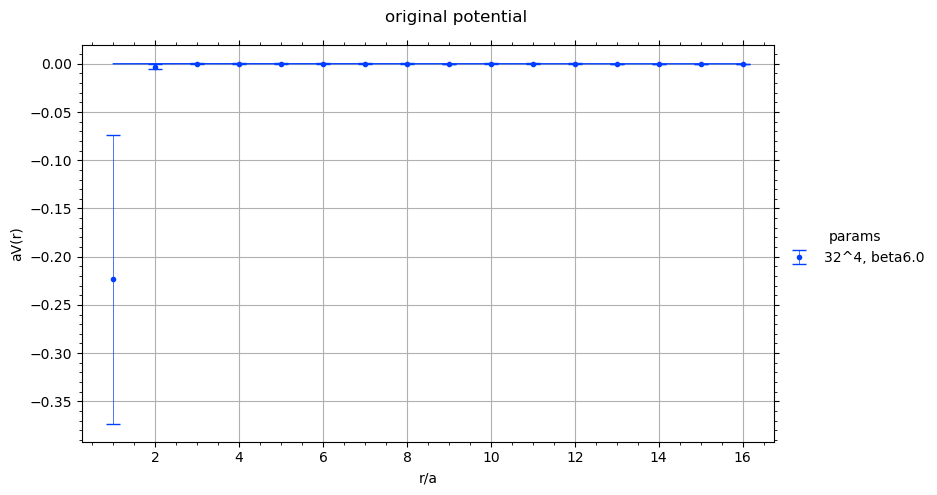

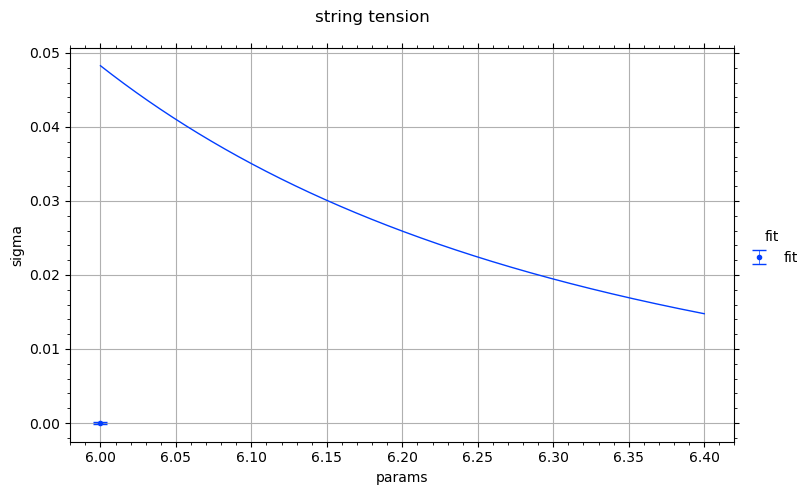

In [8]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/32^4/beta6.0/abelian/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential.csv',
          'parameters': {'params': '32^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 8, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
# df = df[df['err'] < 0.7]
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a  T     aV(r)       err
params        beta                            
16^4, beta6.0 6.0     1  2  0.052945  0.000024
              6.0     1  3  0.052454  0.000024
              6.0     1  4  0.052292  0.000024
              6.0     1  5  0.052231  0.000024
              6.0     1  6  0.052206  0.000024
              6.0     1  7  0.052191  0.000025
              6.0     2  2  0.119423  0.000065
              6.0     2  3  0.117846  0.000068
              6.0     2  4  0.117206  0.000069
              6.0     2  5  0.116918  0.000070
              6.0     2  6  0.116778  0.000070
              6.0     2  7  0.116691  0.000072
              6.0     3  2  0.212877  0.000135
              6.0     3  3  0.209582  0.000143
              6.0     3  4  0.208052  0.000148
              6.0     3  5  0.207245  0.000152
              6.0     3  6  0.206818  0.000155
              6.0     3  7  0.206519  0.000161
              6.0     4  2  0.286674  0.000219
             

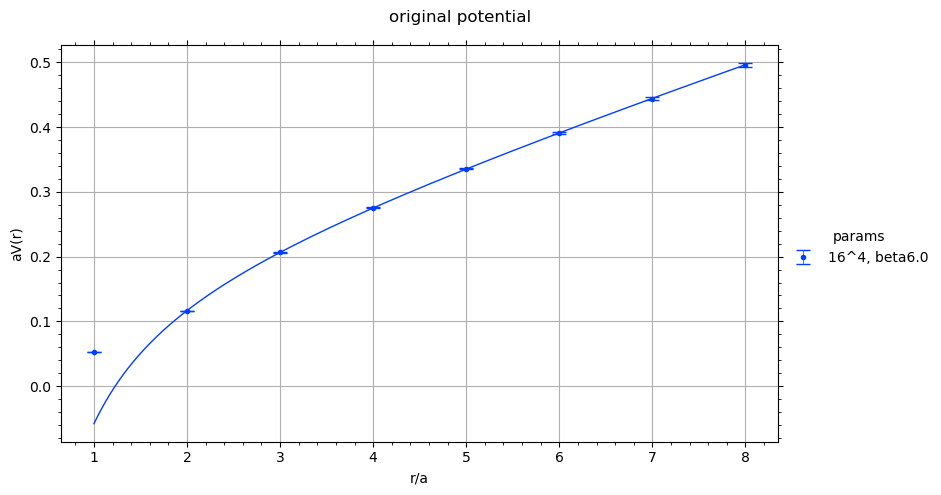

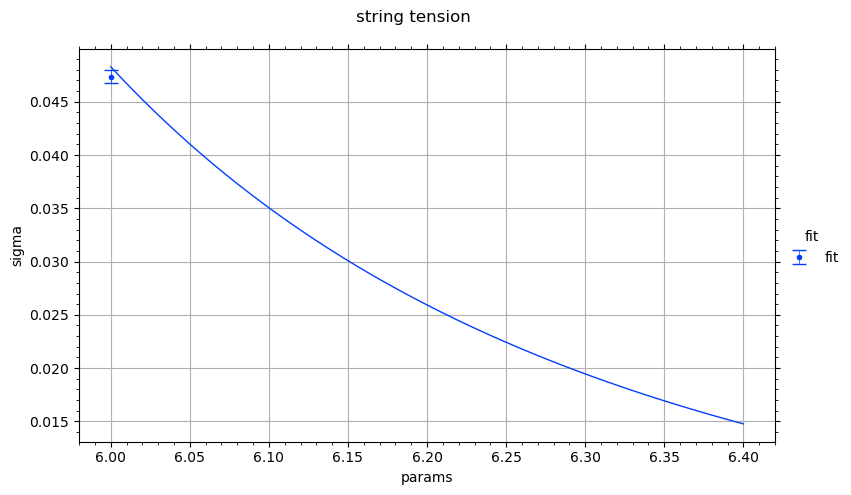

In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '16^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a  T     aV(r)       err
params        beta                            
16^4, beta6.0 6.0     1  2  0.411449  0.000041
              6.0     1  3  0.411181  0.000049
              6.0     1  4  0.411148  0.000062
              6.0     1  5  0.411125  0.000081
              6.0     1  6  0.411121  0.000113
              6.0     1  7  0.411227  0.000161
              6.0     2  2  0.599389  0.000098
              6.0     2  3  0.598086  0.000119
              6.0     2  4  0.597443  0.000165
              6.0     2  5  0.597380  0.000260
              6.0     2  6  0.596960  0.000446
              6.0     2  7  0.597503  0.000777
              6.0     3  2  0.705435  0.000174
              6.0     3  3  0.702429  0.000204
              6.0     3  4  0.700993  0.000292
              6.0     3  5  0.699756  0.000492
              6.0     3  6  0.699564  0.000946
              6.0     3  7  0.699223  0.001884
              6.0     4  2  0.783780  0.000257
             

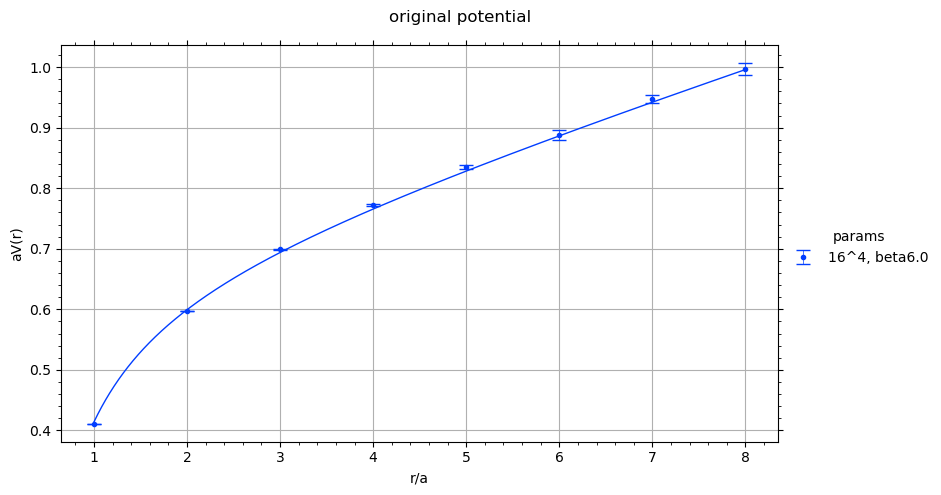

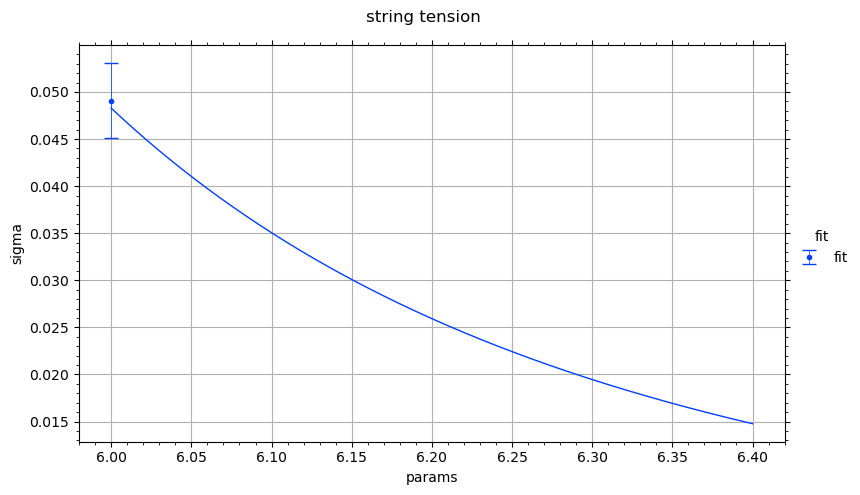

In [4]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/original/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '16^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=6, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a   T     aV(r)        err
params        beta                              
32^4, beta6.0 6.0     1   2  0.118576   0.000006
              6.0     1   3  0.117486   0.000007
              6.0     1   4  0.117127   0.000007
              6.0     1   5  0.116987   0.000007
              6.0     1   6  0.116927   0.000007
...                 ...  ..       ...        ...
              6.0    16  11 -4.928220  19.904639
              6.0    16  12 -3.342844  18.070481
              6.0    16  13  8.582669   7.296347
              6.0    16  14 -8.175805   7.335950
              6.0    16  15 -0.851428   1.359614

[224 rows x 4 columns]
                    r/a     T     aV(r)        err
params        beta                                
32^4, beta6.0 6.0     1  None  0.116878   0.000005
              6.0     2  None  0.259578   0.000022
              6.0     3  None  0.457141   0.000092
              6.0     4  None  0.607500   0.000288
              6.0     5  None  0.

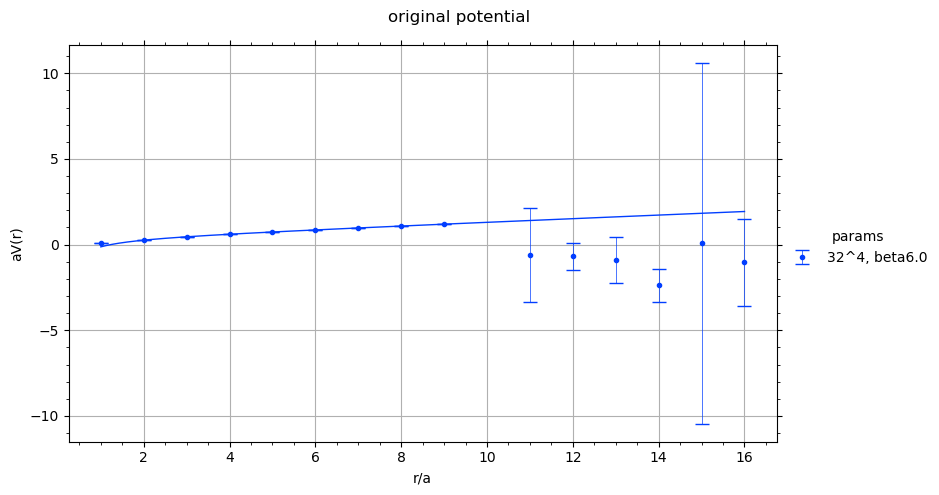

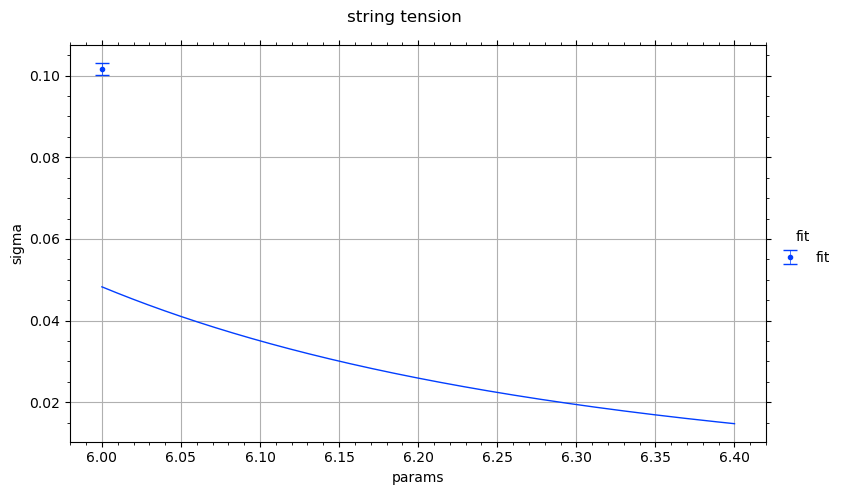

In [9]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/32^4/beta6.0/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 8, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
# df = df[df['err'] < 0.7]
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a   T      aV(r)        err
params        beta                               
32^4, beta6.0 6.0     1   2   0.913687   0.000015
              6.0     1   3   0.913104   0.000026
              6.0     1   4   0.913012   0.000055
              6.0     1   5   0.913101   0.000129
              6.0     1   6   0.912787   0.000309
...                 ...  ..        ...        ...
              6.0    16  11 -15.444713  80.700564
              6.0    16  12  20.668028  11.493287
              6.0    16  13 -11.012218  11.127606
              6.0    16  14   2.123743   3.845017
              6.0    16  15 -13.483923   4.405597

[224 rows x 4 columns]
                    r/a     T        aV(r)           err
params        beta                                      
32^4, beta6.0 6.0     1  None     0.913007  8.199685e-05
              6.0     2  None     1.327690  2.363468e-03
              6.0     3  None     1.542530  3.916990e-02
              6.0     4  None     0.89371

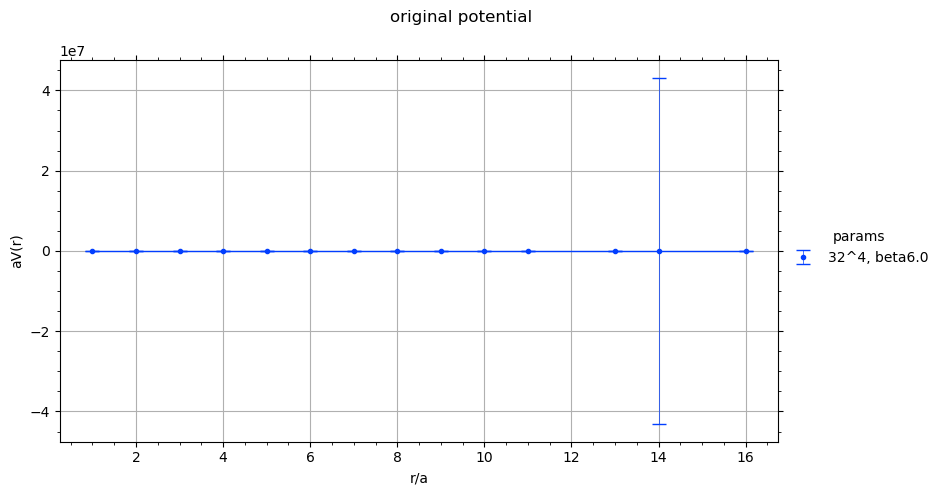

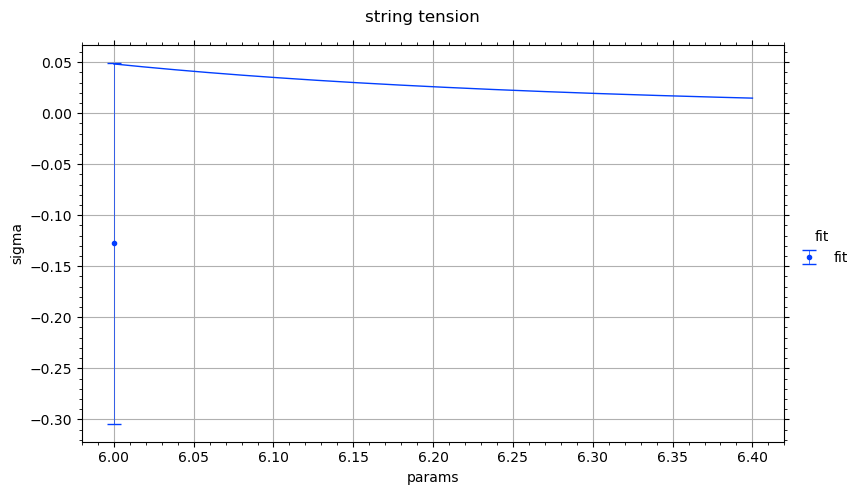

In [10]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/adjoint/on-axis/su3/gluodynamics/32^4/beta6.0/original/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^4, beta6.0', 'beta': 6.0}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 8, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
# df = df[df['err'] < 0.7]
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                    r/a   T     aV(r)       err
params        beta                             
36^4, beta6.1 6.1     1   2  0.393207  0.000002
              6.1     1   3  0.392945  0.000003
              6.1     1   4  0.392861  0.000003
              6.1     1   5  0.392831  0.000004
              6.1     1   6  0.392817  0.000006
...                 ...  ..       ...       ...
              6.1    18  13  3.700455  1.036057
              6.1    18  14 -2.912167  1.314249
              6.1    18  15  3.195877  1.179019
              6.1    18  16 -2.896347  1.423629
              6.1    18  17  2.706762  4.013226

[288 rows x 4 columns]
                    r/a     T     aV(r)       err
params        beta                               
36^4, beta6.1 6.1     1  None  0.392810  0.000007
              6.1     2  None  0.562003  0.000041
              6.1     3  None  0.650429  0.000061
              6.1     4  None  0.711078  0.000161
              6.1     5  None  0.760702  0.000340
  

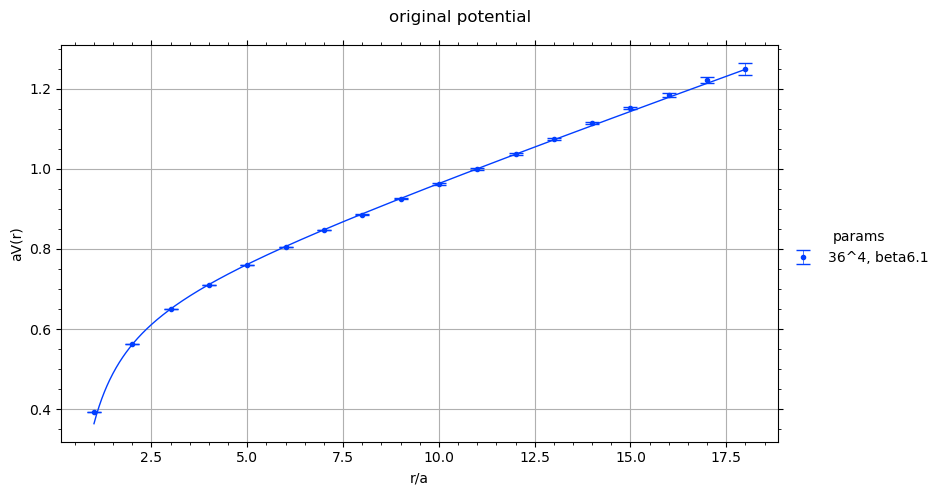

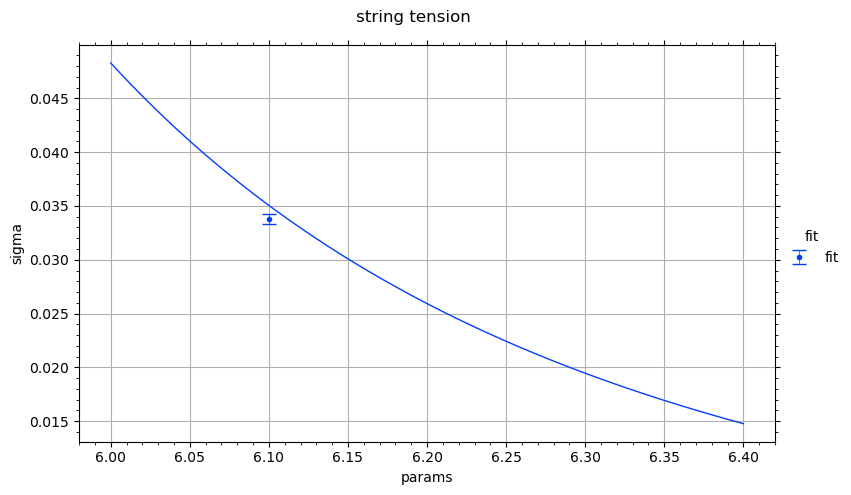

In [8]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su3/gluodynamics/36^4/beta6.1/original/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '36^4, beta6.1', 'beta': 6.1}}]
image_path = f'../../images/potential_gevp/su3/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params', 'beta'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 8, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                 r/a   T     aV(r)       err
params                                      
32^3x40, mu0.20    1   2  0.043620  0.000005
32^3x40, mu0.20    1   3  0.043052  0.000005
32^3x40, mu0.20    1   4  0.042854  0.000005
32^3x40, mu0.20    1   5  0.042764  0.000005
32^3x40, mu0.20    1   6  0.042722  0.000006
...              ...  ..       ...       ...
32^3x28, mu0.20   16   9  0.379109  0.009125
32^3x28, mu0.20   16  10  0.362854  0.009715
32^3x28, mu0.20   16  11  0.344135  0.009287
32^3x28, mu0.20   16  12  0.346720  0.011221
32^3x28, mu0.20   16  13  0.311919  0.012460

[960 rows x 4 columns]
                 r/a     T     aV(r)       err
params                                        
32^3x28, mu0.20    1  None  0.042514  0.000008
32^3x28, mu0.20    2  None  0.091603  0.000032
32^3x28, mu0.20    3  None  0.155241  0.000289
32^3x28, mu0.20    4  None  0.196170  0.000402
32^3x28, mu0.20    5  None  0.224671  0.000670
...              ...   ...       ...       ...
32^3x40, mu0.20

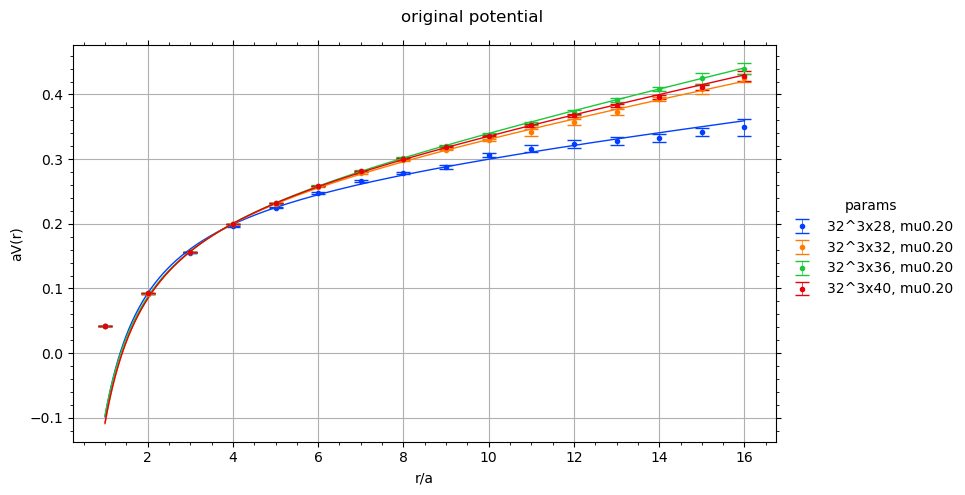

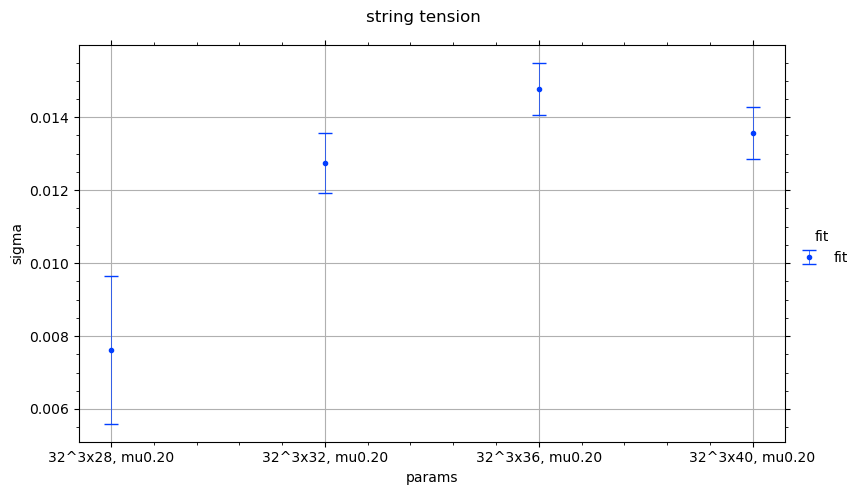

In [34]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x40, mu0.20'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x36, mu0.20'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x32/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x32, mu0.20'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.20/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x28, mu0.20'}}]
image_path = f'../../images/potential_gevp/su2/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='params')
plots.plot_potential_single(df_fit, 'params', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

                 r/a  T     aV(r)       err
params                                     
32^3x40, mu0.15    1  2  0.043560  0.000005
32^3x40, mu0.15    1  3  0.042995  0.000005
32^3x40, mu0.15    1  4  0.042798  0.000005
32^3x40, mu0.15    1  5  0.042712  0.000006
32^3x40, mu0.15    1  6  0.042673  0.000006
...              ... ..       ...       ...
32^3x16, mu0.15   16  3  0.488637  0.000851
32^3x16, mu0.15   16  4  0.439052  0.001051
32^3x16, mu0.15   16  5  0.398591  0.001293
32^3x16, mu0.15   16  6  0.361934  0.001663
32^3x16, mu0.15   16  7  0.322342  0.001916

[1344 rows x 4 columns]
                 r/a     T     aV(r)       err
params                                        
32^3x20, mu0.15    1  None  0.042387  0.000018
32^3x20, mu0.15    2  None  0.091148  0.000023
32^3x20, mu0.15    3  None  0.153741  0.000224
32^3x20, mu0.15    4  None  0.191635  0.002465
32^3x20, mu0.15    5  None  0.221647  0.000336
...              ...   ...       ...       ...
32^3x40, mu0.15   12  None 

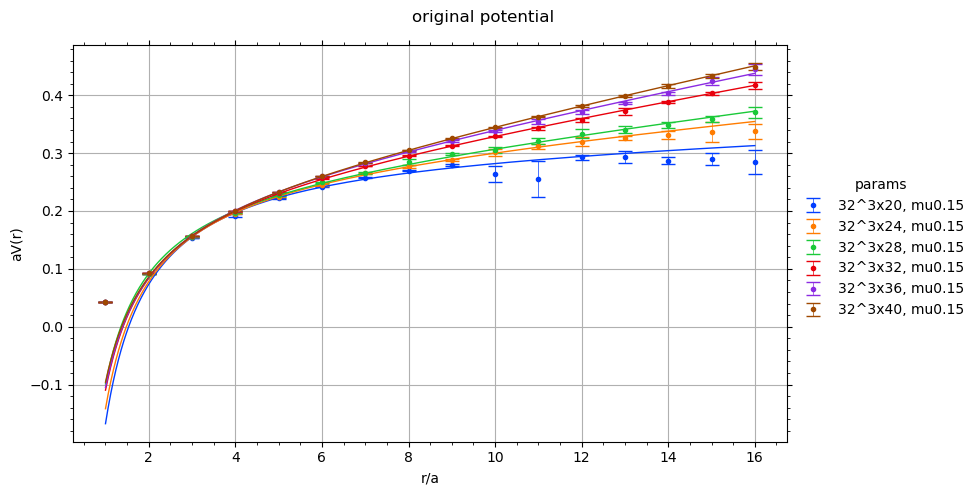

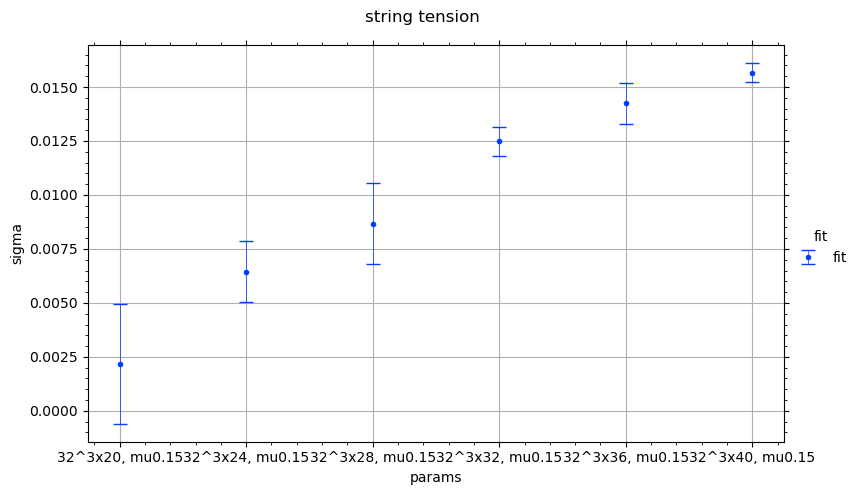

In [33]:
show_plot = True
coordinate = 'r/a'
hue = 'params'
groupby = []
paths = [{'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x40/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x40, mu0.15'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x36/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x36, mu0.15'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x32/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x32, mu0.15'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x28/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x28, mu0.15'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x24/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x24, mu0.15'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x20/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x20, mu0.15'}},
          {'path': '../../result/potential_gevp/fundamental/on-axis/su2/qc2dstag/32^3x16/mu0.15/original/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential.csv',
          'parameters': {'params': '32^3x16, mu0.15'}}]
image_path = f'../../images/potential_gevp/su2/gluodynamics/'
image_name = f'potentials'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['params'])
df = df.rename({'potential': 'aV(r)', 'space_size': 'r/a', 'time_size': 'T'}, axis=1)
print(df)
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 5, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
# save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level=index)
df_curves = df_curves.reset_index(level=index)
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='params')
plots.plot_potential_single(df_fit, 'params', 'sigma', 'fit', 'params', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err')
# plots.plot_potential_single(df_fit, 'params', 'alpha', 'fit', 'params', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

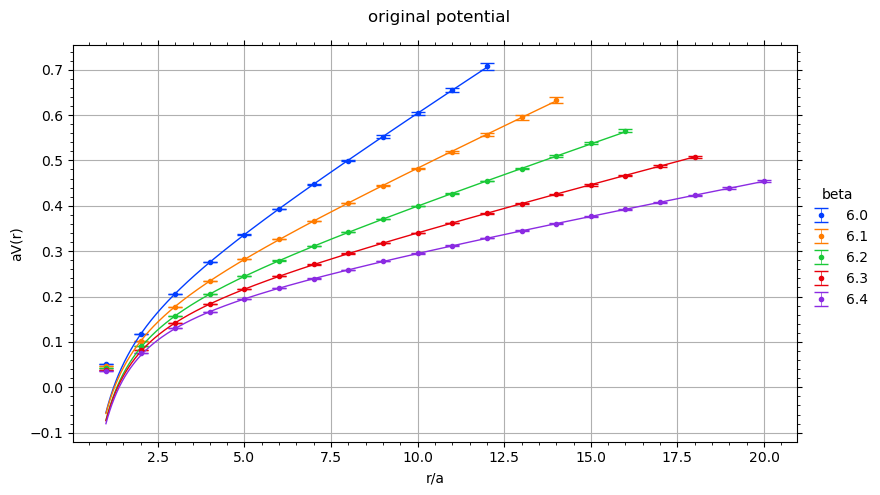

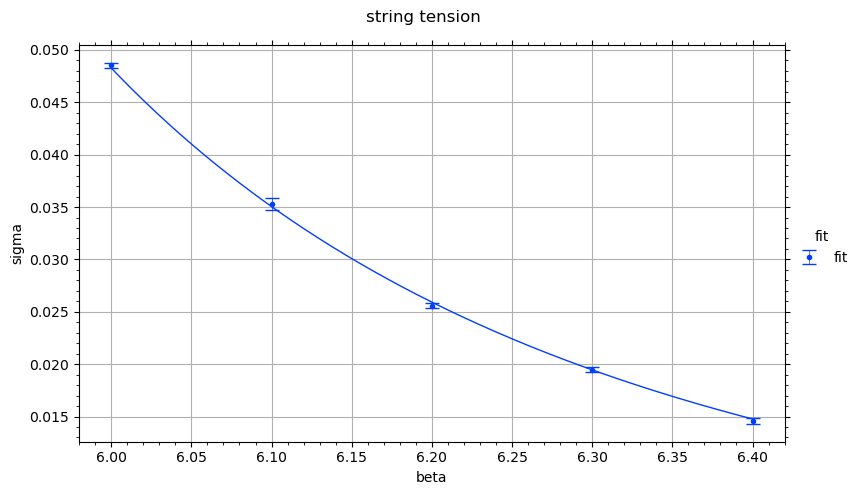

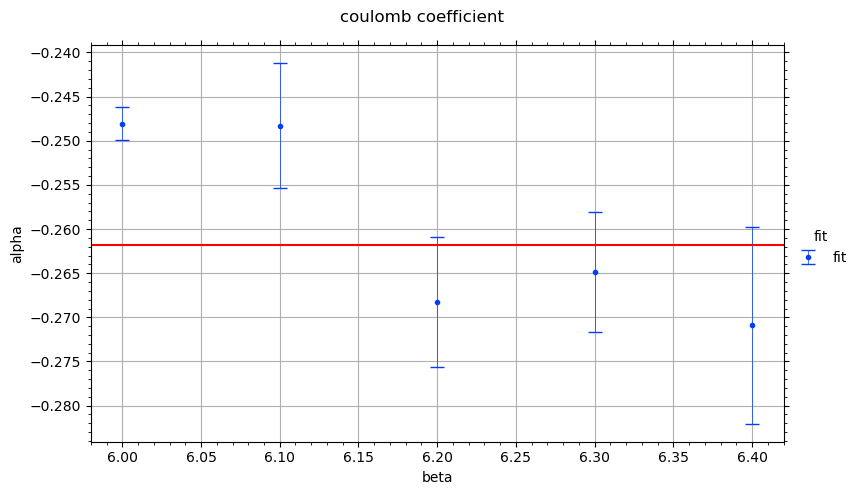

In [21]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 12), 'T': (1, 11)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/28^4/beta6.1/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.1}, 'constraints': {'r/a': (1, 14), 'T': (1, 13)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.2}, 'constraints': {'r/a': (1, 16), 'T': (1, 16)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.3}, 'constraints': {'r/a': (1, 18), 'T': (1, 18)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.4}, 'constraints': {'r/a': (1, 20), 'T': (1, 20)}}]
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
#           'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 12), 'T': (1, 11)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'beta_comparison'
df = potential_data.get_potantial_df(paths, coluns_to_multiindex=['beta'])
df = df[df['aV(r)'] != 0]
index = []
if df.index.names[0] is not None:
    index = df.index.names
df = df.set_index(['r/a'], append=True).groupby(index + ['r/a']).apply(fit.potential_fit_T_range, 9, include_groups=False).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df = df.drop('T', axis = 1)
df_fit = df.groupby(index).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err', range_min_len=8, include_groups=False).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(index).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a', include_groups=False).reset_index(level=-1, drop=True)
save_sigma_csv(df_fit)
index_fit = []
if df.index.names[0] is not None:
    index_fit = df.index.names
df_curves = df_fit.groupby(index_fit).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma'], include_groups=False).reset_index(level=-1, drop=True)
df = df.reset_index(level='beta')
df_curves = df_curves.reset_index(level='beta')
plots.plot_potential_single(df, coordinate, 'aV(r)', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, err='err', df_fits=df_curves)
x_fit = np.linspace(6, 6.4, 1000)
y_fit = scaler.get_a_sqrt_sigma(x_fit) ** 2
df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
df_string_tension_fit['fit'] = 'fit'
df_fit['fit'] = 'fit'
df_fit = df_fit.reset_index(level='beta')
plots.plot_potential_single(df_fit, 'beta', 'sigma', 'fit', 'beta', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension', show_plot, err='sigma_err', df_fits=df_string_tension_fit)
plots.plot_potential_single(df_fit, 'beta', 'alpha', 'fit', 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, err='alpha_err', black_line_y=-math.pi/12)

In [10]:
# fit linear string tension for each copy and plot string tension
# dependence on average functional of gauge copy
def string_tension_copy(paths_potential, paths_functional, image_path_potential, image_name_potential, image_path_functional, image_name_functional):
    data = potential_data.get_potantial_df(paths_potential)
    data = data.drop('T', axis = 1)
    # df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (5, 12), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
    #                 .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
    fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (3, 12), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
    fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
    fit_params['sigma'] = np.sqrt(fit_params['sigma'])
    df_func = functional.read_functional(paths_functional)
    df_func = functional.fill_funcational_max(df_func, ['steps'])
    fit_params = fit_params.merge(df_func, how='inner', on=['steps', 'copy'])
    plots.plot_potential_single(data, 'r/a', 'aV(r)', 'err', 'copy', 'r/a', 'aV(r)', 'original potential', image_path_potential, image_name_potential, True)
    plots.plot_potential_single(fit_params, 'functional', 'sigma', 'sigma_err', None, 'functional', 'sigma', 'string tension', image_path_functional, image_name_functional, True)

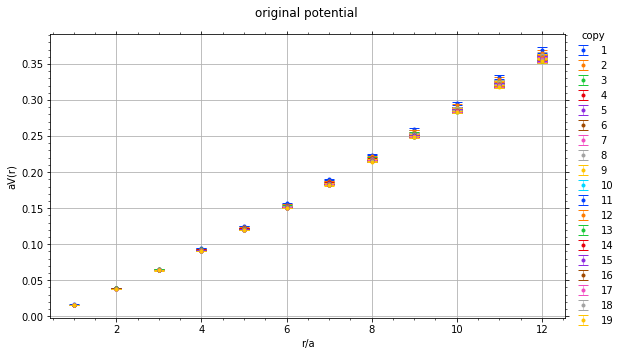

../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20//copy_comparison


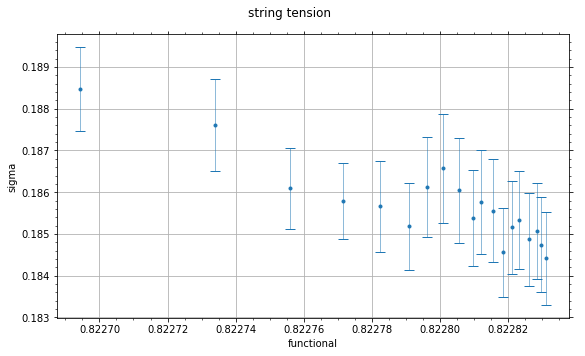

../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20//string_tension_functional


In [11]:
paths_potential = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_100/copies=20/0.01/potential_monopole.csv',
          'parameters': {'beta': 6.0, 'steps': 100}, 'constraints': {'r/a': (1, 12), 'T': (10, 10)}}]
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/functional', 'conf_range': (1, 1000), 'parameters': {'steps': 100}}]
image_path_potential = f'../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20/'
image_name_potential = f'copy_comparison'
image_path_functional = f'../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20/'
image_name_functional = 'string_tension_functional'
string_tension_copy(paths_potential, paths_functional, image_path_potential, image_name_potential, image_path_functional, image_name_functional)

    copy  beta        V0    V0_err     alpha  alpha_err     sigma  sigma_err  \
0      1   6.0 -0.070758  0.003500  0.090771   0.007413  0.035521   0.000379   
1      2   6.0 -0.070871  0.003784  0.091756   0.007994  0.035199   0.000411   
2      3   6.0 -0.067968  0.003304  0.086816   0.006985  0.034631   0.000359   
3      4   6.0 -0.067580  0.003130  0.086094   0.006612  0.034517   0.000340   
4      5   6.0 -0.068512  0.003728  0.088493   0.007866  0.034472   0.000406   
5      6   6.0 -0.067812  0.003548  0.087488   0.007510  0.034294   0.000385   
6      7   6.0 -0.070443  0.004122  0.092175   0.008712  0.034641   0.000448   
7      8   6.0 -0.071903  0.004511  0.094917   0.009526  0.034808   0.000491   
8      9   6.0 -0.070932  0.004321  0.093374   0.009138  0.034612   0.000469   
9     10   6.0 -0.069167  0.003931  0.090096   0.008319  0.034367   0.000426   
10    11   6.0 -0.070486  0.004254  0.092589   0.009003  0.034509   0.000461   
11    12   6.0 -0.069963  0.004234  0.09

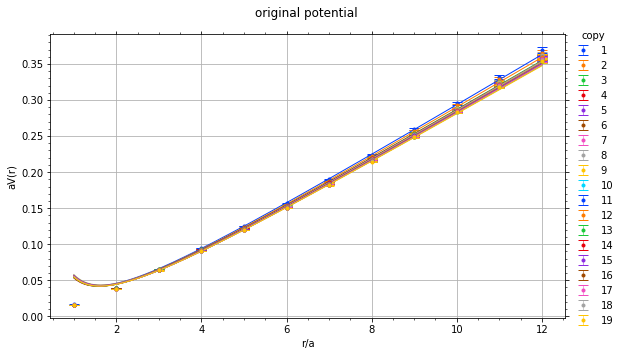

../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20//copy_comparison


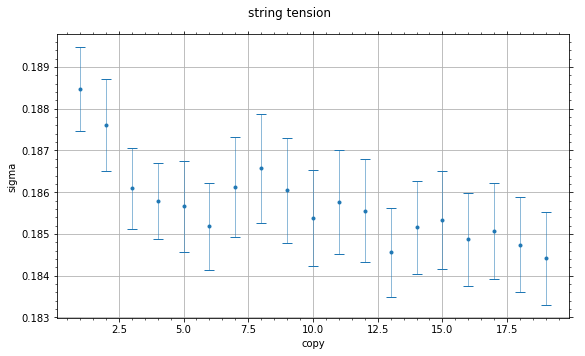

../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20//string_tension


In [12]:
show_plot = True
coordinate = 'r/a'
hue = 'copy'
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_100/copies=20/0.01/potential_monopole.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 12), 'T': (10, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20/'
image_name = f'copy_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (3, 12), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (3, 12), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
plots.plot_potential_single(fit_params, 'copy', 'sigma', 'sigma_err', None, 'copy', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=4000/copies=20/', 'string_tension', show_plot)

    copy  beta        V0    V0_err     sigma  sigma_err    chi_sq
0      1   6.0 -0.028802  0.002197  0.031213   0.000531  0.002555
1      2   6.0 -0.028072  0.002127  0.030735   0.000516  0.002428
2      3   6.0 -0.027810  0.002098  0.030484   0.000506  0.002311
3      4   6.0 -0.027664  0.002070  0.030386   0.000501  0.002256
4      5   6.0 -0.027263  0.002081  0.030158   0.000504  0.002398
5      6   6.0 -0.027471  0.002142  0.030168   0.000516  0.002537
6      7   6.0 -0.027732  0.002188  0.030233   0.000528  0.002662
7      8   6.0 -0.027694  0.002211  0.030203   0.000534  0.002821
8      9   6.0 -0.027557  0.002188  0.030118   0.000529  0.002711
9     10   6.0 -0.027371  0.002122  0.030046   0.000512  0.002482
10    11   6.0 -0.027420  0.002125  0.030037   0.000511  0.002441
11    12   6.0 -0.027474  0.002140  0.030048   0.000514  0.002511
12    13   6.0 -0.027383  0.002141  0.029989   0.000514  0.002500
13    14   6.0 -0.027632  0.002191  0.030065   0.000526  0.002608
14    15  

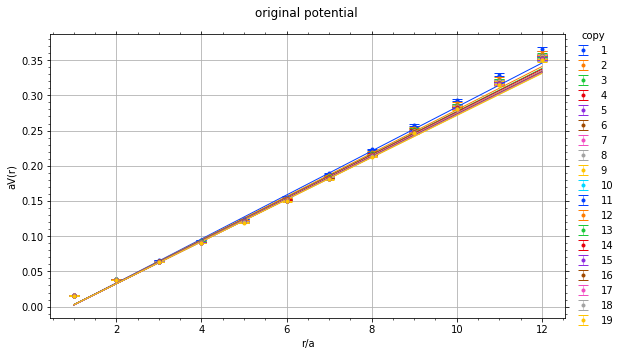

../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=100/copies=20//copy_comparison


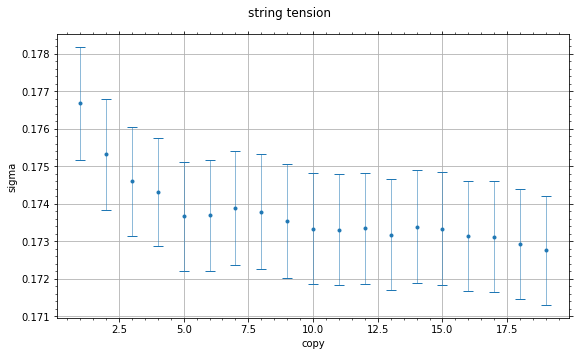

../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=100/copies=20//string_tension


In [19]:
show_plot = True
coordinate = 'r/a'
hue = 'copy'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_100/copies=20/0.01/potential_monopole.csv',
          'parameters': {'beta': 6.0}, 'constraints': {'r/a': (1, 12), 'T': (8, 8)}}]
image_path = f'../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=100/copies=20/'
image_name = f'copy_comparison'
data = potential_data.get_potantial_df(paths)
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 12)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (3, 12), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (3, 12), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
# plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot)
# x_fit = np.linspace(6, 6.4, 1000)
# y_fit = scaler.get_a_sqrt_sigma(x_fit)
# df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
# df_string_tension_fit['fit'] = 'fit'
# fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'copy', 'sigma', 'sigma_err', None, 'copy', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/24^4/beta6.0/steps=100/copies=20/', 'string_tension', show_plot)
# plots.plot_potential_single(fit_params, 'beta', 'alpha', 'alpha_err', 'fit', 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient', show_plot, black_line_y=-math.pi/12)

/home/ilya/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


   copy  Nt potential_type        V0    V0_err     sigma  sigma_err    chi_sq
0     1  16       original -0.003487  0.000730  0.038245   0.000108  0.002891
1     1  18       original -0.005352  0.000523  0.038576   0.000089  0.000776
2     1  20       original -0.011278  0.000584  0.040294   0.000092  0.008274
   copy  Nt potential_type        V0    V0_err     sigma  sigma_err    chi_sq
0     1  16       original -0.003487  0.000730  0.195563   0.000277  0.002891
1     1  18       original -0.005352  0.000523  0.196407   0.000227  0.000776
2     1  20       original -0.011278  0.000584  0.200733   0.000230  0.008274


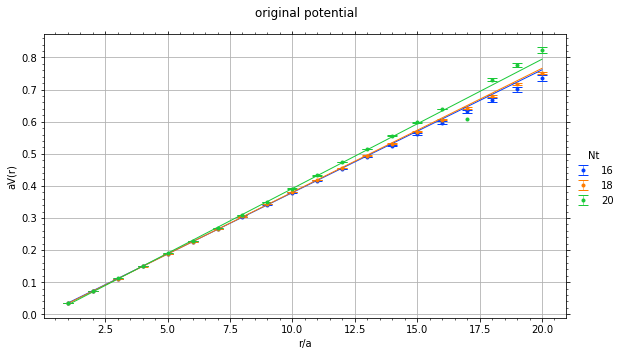

../../images/potential/su3/QCD/140MeV//size_comparison


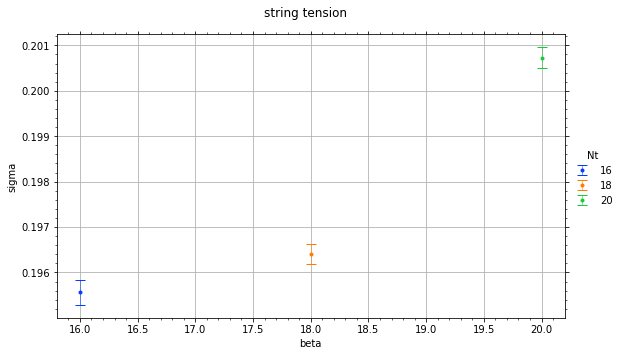

../../images/potential/su3/QCD/140MeV//string_tension_nt20


In [70]:
show_plot = True
coordinate = 'r/a'
hue = 'Nt'
groupby = []
# paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
#           'parameters': {'Nt': 20, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 8), 'smearing_step': (11, 11)}},
#           {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
#           'parameters': {'Nt': 18, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 8), 'smearing_step': (11, 11)}},
#           {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt16/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
#           'parameters': {'Nt': 16, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 7), 'smearing_step': (11, 11)}},
#           {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt14/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
#           'parameters': {'Nt': 14, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 6), 'smearing_step': (11, 11)}},
#           {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt12/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
#           'parameters': {'Nt': 12, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 5), 'smearing_step': (11, 11)}},
#           {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt10/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
#           'parameters': {'Nt': 10, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 4), 'smearing_step': (11, 11)}}]
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 20, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 8), 'smearing_step': (6, 6)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 18, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 8), 'smearing_step': (6, 6)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt16/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 16, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 7), 'smearing_step': (6, 6)}}]
image_path = f'../../images/potential/su3/QCD/140MeV/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('smearing_step', axis = 1)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (4, 32), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (4, 32), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
# plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot)
#x_fit = np.linspace(6, 6.4, 1000)
#y_fit = scaler.get_a_sqrt_sigma(x_fit)
#df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
#df_string_tension_fit['fit'] = 'fit'
#fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'Nt', 'sigma', 'sigma_err', hue, 'beta', 'sigma', 'string tension', f'../../images/potential/su3/QCD/140MeV/', 'string_tension_nt20', show_plot)

   copy  T  Nt potential_type        V0    V0_err     sigma  sigma_err  \
0     1  1   4       original  0.010239  0.000036  0.004021   0.000004   
1     1  2   6       original  0.026956  0.000322  0.002805   0.000036   
2     1  3   8       original  0.046519  0.001296  0.003907   0.000136   
3     1  4  10       original  0.062507  0.003372  0.007765   0.000388   
4     1  5  12       original  0.054342  0.004821  0.016138   0.000683   
5     1  6  14       original  0.025802  0.003406  0.026130   0.000560   
6     1  7  16       original -0.001237  0.000855  0.037014   0.000152   
7     1  8  18       original -0.004111  0.000417  0.037825   0.000077   
8     1  8  20       original -0.006836  0.000392  0.038941   0.000072   

     chi_sq  
0  0.000002  
1  0.000121  
2  0.001128  
3  0.006514  
4  0.017915  
5  0.017752  
6  0.007829  
7  0.003268  
8  0.000461  
   copy  T  Nt potential_type        V0    V0_err     sigma  sigma_err  \
0     1  1   4       original  0.010239  0.00

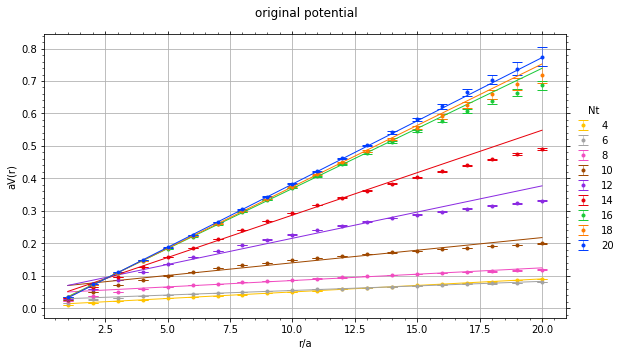

../../images/potential/su3/QCD/140MeV//size_comparison


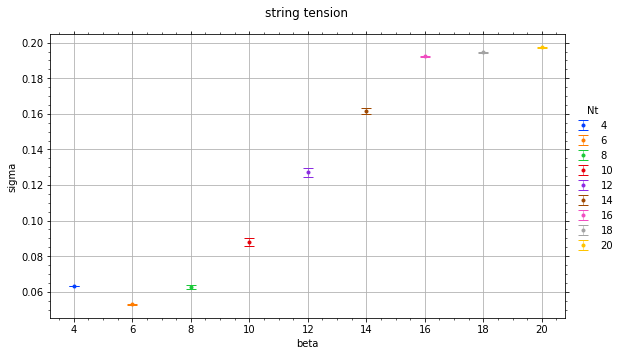

../../images/potential/su3/QCD/140MeV//string_tension_nt20


KeyError: "['alpha', 'alpha_err'] not in index"

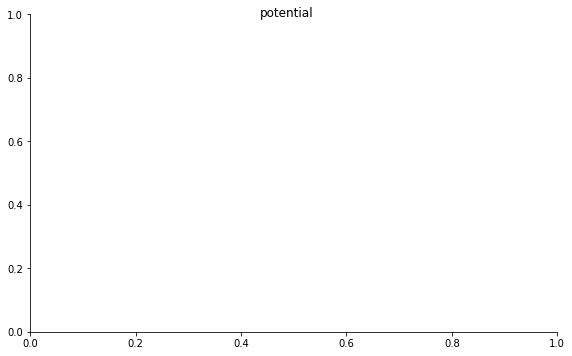

In [61]:
show_plot = True
coordinate = 'r/a'
hue = 'Nt'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 20, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (8, 8), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 18, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (8, 8), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt16/HYP0_APE_alpha=0.6/steps_500/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 16, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (7, 7), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt14/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 14, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (6, 6), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt12/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 12, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (5, 5), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt10/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 10, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (4, 4), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt8/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 8, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (3, 3), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt6/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 6, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 2), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt4/HYP0_APE_alpha=0.6/steps_2000/copies=1/potential_monopole.csv',
          'parameters': {'Nt': 4, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 1), 'smearing_step': (26, 26)}}]
image_path = f'../../images/potential/su3/QCD/140MeV/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('smearing_step', axis = 1)
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
# data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (4, 32), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (4, 32), fit.func_linear, ['V0', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
# plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot)
#x_fit = np.linspace(6, 6.4, 1000)
#y_fit = scaler.get_a_sqrt_sigma(x_fit)
#df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
#df_string_tension_fit['fit'] = 'fit'
#fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'Nt', 'sigma', 'sigma_err', hue, 'beta', 'sigma', 'string tension', f'../../images/potential/su3/QCD/140MeV/', 'string_tension_nt20', show_plot)
plots.plot_potential_single(fit_params, 'Nt', 'alpha', 'alpha_err', hue, 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/QCD/140MeV/', 'coulomb_coefficient_nt20', show_plot,  black_line_y=-math.pi/12)

   copy  smearing potential_type        V0    V0_err     alpha  alpha_err  \
0     0         6       original  0.277371  0.001438 -0.417980   0.003061   
1     0        11       original  0.286711  0.001359 -0.433749   0.002969   
2     0        16       original  0.287943  0.001442 -0.435690   0.003240   
3     0        21       original  0.290558  0.001097 -0.440979   0.002517   
4     0        26       original  0.292186  0.001034 -0.444532   0.002382   
5     0        31       original  0.292623  0.001411 -0.445974   0.003241   

      sigma  sigma_err    chi_sq  
0  0.037032   0.000154  0.000715  
1  0.035639   0.000140  0.000306  
2  0.035449   0.000142  0.000285  
3  0.035171   0.000103  0.000146  
4  0.035038   0.000097  0.000059  
5  0.035075   0.000132  0.000642  
   copy  smearing potential_type        V0    V0_err     alpha  alpha_err  \
0     0         6       original  0.277371  0.001438 -0.417980   0.003061   
1     0        11       original  0.286711  0.001359 -0.43374

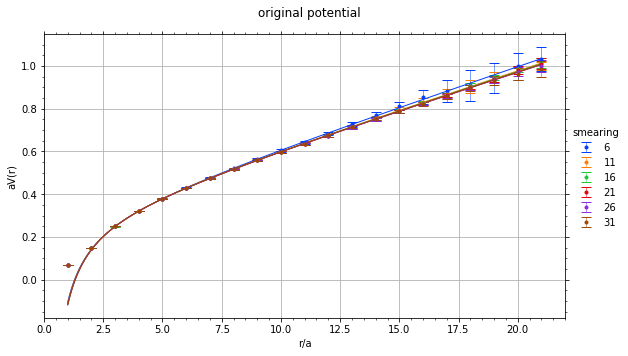

../../images/potential/su3/QCD/140MeV//size_comparison


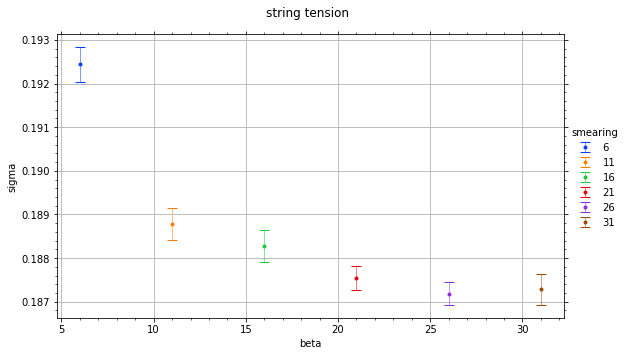

../../images/potential/su3/QCD/140MeV//string_tension_nt20


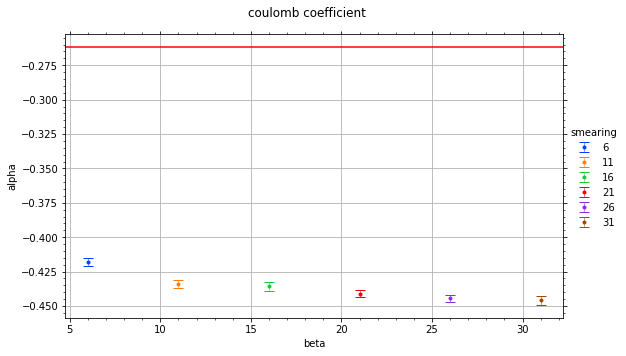

../../images/potential/su3/QCD/140MeV//coulomb_coefficient_nt20


In [53]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'smearing': 6, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 21), 'T': (1, 10), 'smearing_step': (6, 6)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'smearing': 11, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 21), 'T': (1, 10), 'smearing_step': (11, 11)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'smearing': 16, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 21), 'T': (1, 10), 'smearing_step': (16, 16)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'smearing': 21, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 21), 'T': (1, 10), 'smearing_step': (21, 21)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'smearing': 26, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 21), 'T': (1, 10), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'smearing': 31, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 21), 'T': (1, 10), 'smearing_step': (31, 31)}}]
image_path = f'../../images/potential/su3/QCD/140MeV/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('smearing_step', axis = 1)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (3, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (3, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
# plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot)
#x_fit = np.linspace(6, 6.4, 1000)
#y_fit = scaler.get_a_sqrt_sigma(x_fit)
#df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
#df_string_tension_fit['fit'] = 'fit'
#fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'smearing', 'sigma', 'sigma_err', hue, 'beta', 'sigma', 'string tension', f'../../images/potential/su3/QCD/140MeV/', 'string_tension_nt20', show_plot)
plots.plot_potential_single(fit_params, 'smearing', 'alpha', 'alpha_err', hue, 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/QCD/140MeV/', 'coulomb_coefficient_nt20', show_plot,  black_line_y=-math.pi/12)

   copy  T  time potential_type        V0    V0_err     alpha  alpha_err  \
0     0  5     5       original  0.285361  0.001750 -0.450138   0.004837   
1     0  6     6       original  0.305230  0.002734 -0.490970   0.007337   
2     0  7     7       original  0.315613  0.004434 -0.506996   0.011592   
3     0  8     8       original  0.292910  0.006053 -0.449639   0.015349   

      sigma  sigma_err    chi_sq  
0  0.037775   0.000148  0.003567  
1  0.034856   0.000241  0.005824  
2  0.032944   0.000404  0.021811  
3  0.034908   0.000574  0.043379  
   copy  T  time potential_type        V0    V0_err     alpha  alpha_err  \
0     0  5     5       original  0.285361  0.001750 -0.450138   0.004837   
1     0  6     6       original  0.305230  0.002734 -0.490970   0.007337   
2     0  7     7       original  0.315613  0.004434 -0.506996   0.011592   
3     0  8     8       original  0.292910  0.006053 -0.449639   0.015349   

      sigma  sigma_err    chi_sq  
0  0.194359   0.000381  0.00

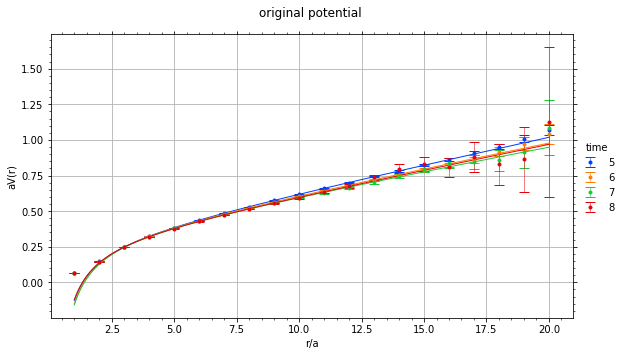

../../images/potential/su3/QCD/140MeV//size_comparison


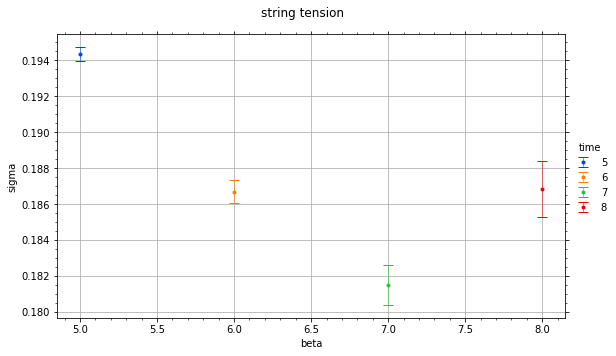

../../images/potential/su3/QCD/140MeV//string_tension_nt20


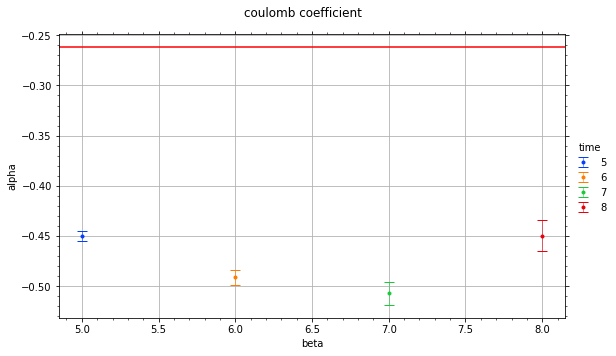

../../images/potential/su3/QCD/140MeV//coulomb_coefficient_nt20


In [54]:
show_plot = True
coordinate = 'r/a'
hue = 'time'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'time': 5, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (5, 5), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'time': 6, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (6, 6), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'time': 7, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (7, 7), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'time': 8, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (8, 8), 'smearing_step': (26, 26)}}]
image_path = f'../../images/potential/su3/QCD/140MeV/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('smearing_step', axis = 1)
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
# data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (4, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (4, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
# plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot)
#x_fit = np.linspace(6, 6.4, 1000)
#y_fit = scaler.get_a_sqrt_sigma(x_fit)
#df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
#df_string_tension_fit['fit'] = 'fit'
#fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'time', 'sigma', 'sigma_err', hue, 'beta', 'sigma', 'string tension', f'../../images/potential/su3/QCD/140MeV/', 'string_tension_nt20', show_plot)
plots.plot_potential_single(fit_params, 'time', 'alpha', 'alpha_err', hue, 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/QCD/140MeV/', 'coulomb_coefficient_nt20', show_plot,  black_line_y=-math.pi/12)

   copy  Nt potential_type        V0    V0_err     alpha  alpha_err     sigma  \
0     0  12       original  0.547166  0.020750 -1.002852   0.055938  0.003261   
1     0  14       original  0.434850  0.009469 -0.761046   0.026079  0.017466   
2     0  16       original  0.358537  0.005765 -0.604514   0.016756  0.027750   
3     0  18       original  0.295067  0.003721 -0.449902   0.011066  0.034138   
4     0  20       original  0.297460  0.001246 -0.461920   0.003788  0.034716   

   sigma_err    chi_sq  
0   0.001822  0.062214  
1   0.000807  0.004076  
2   0.000452  0.001150  
3   0.000280  0.001020  
4   0.000090  0.000044  
   copy  Nt potential_type        V0    V0_err     alpha  alpha_err     sigma  \
0     0  12       original  0.547166  0.020750 -1.002852   0.055938  0.057106   
1     0  14       original  0.434850  0.009469 -0.761046   0.026079  0.132159   
2     0  16       original  0.358537  0.005765 -0.604514   0.016756  0.166582   
3     0  18       original  0.295067  0

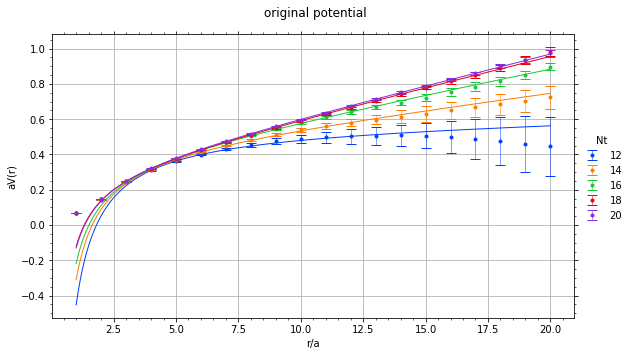

../../images/potential/su3/QCD/140MeV//size_comparison


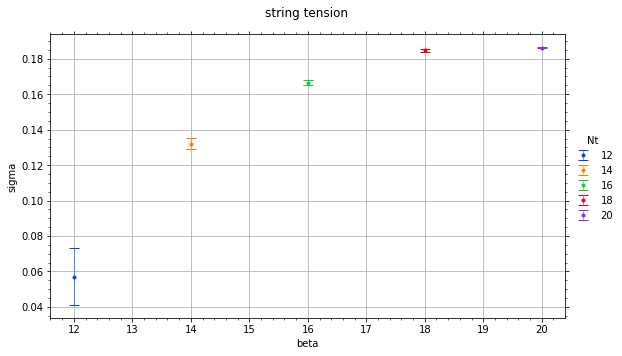

../../images/potential/su3/QCD/140MeV//string_tension_nt20


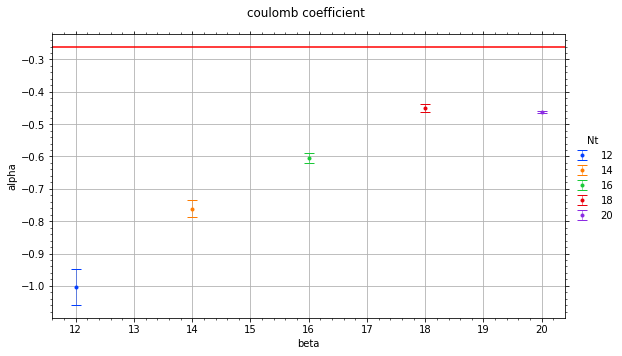

../../images/potential/su3/QCD/140MeV//coulomb_coefficient_nt20


In [57]:
show_plot = True
coordinate = 'r/a'
hue = 'Nt'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 20, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 8), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 18, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 8), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt16/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 16, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 8), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt14/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 14, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 8), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt12/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 12, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 4), 'smearing_step': (26, 26)}}]
image_path = f'../../images/potential/su3/QCD/140MeV/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('smearing_step', axis = 1)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (4, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (4, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
# plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot)
#x_fit = np.linspace(6, 6.4, 1000)
#y_fit = scaler.get_a_sqrt_sigma(x_fit)
#df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
#df_string_tension_fit['fit'] = 'fit'
#fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'Nt', 'sigma', 'sigma_err', hue, 'beta', 'sigma', 'string tension', f'../../images/potential/su3/QCD/140MeV/', 'string_tension_nt20', show_plot)
plots.plot_potential_single(fit_params, 'Nt', 'alpha', 'alpha_err', hue, 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/QCD/140MeV/', 'coulomb_coefficient_nt20', show_plot,  black_line_y=-math.pi/12)

   copy  T  Nt potential_type        V0    V0_err     alpha  alpha_err  \
0     0  1   4       original  0.182028  0.002725 -0.162655   0.008889   
1     0  2   6       original  0.327402  0.003298 -0.413313   0.010720   
2     0  3   8       original  0.429075  0.001338 -0.672341   0.004219   
3     0  4  10       original  0.460284  0.005671 -0.783839   0.017007   
4     0  5  12       original  0.438757  0.007857 -0.760868   0.022244   
5     0  6  14       original  0.398337  0.009719 -0.682564   0.026460   
6     0  6  16       original  0.333807  0.004946 -0.550395   0.013352   
7     0  6  18       original  0.310716  0.003938 -0.497340   0.010568   
8     0  6  20       original  0.305230  0.002734 -0.490970   0.007337   

      sigma  sigma_err    chi_sq  
0  0.020448   0.000178  0.000107  
1  0.009123   0.000216  0.000219  
2  0.006814   0.000093  0.000053  
3  0.009387   0.000425  0.000953  
4  0.015438   0.000643  0.006280  
5  0.021793   0.000839  0.014723  
6  0.030755   

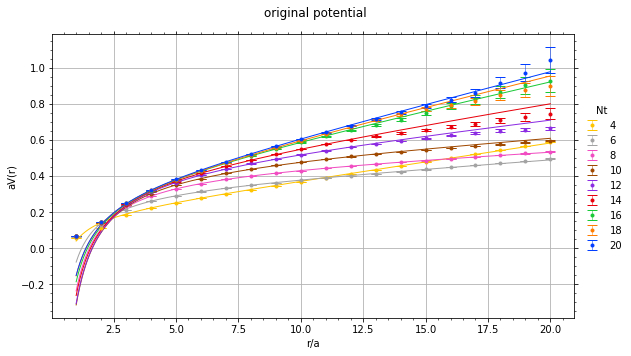

../../images/potential/su3/QCD/140MeV//size_comparison


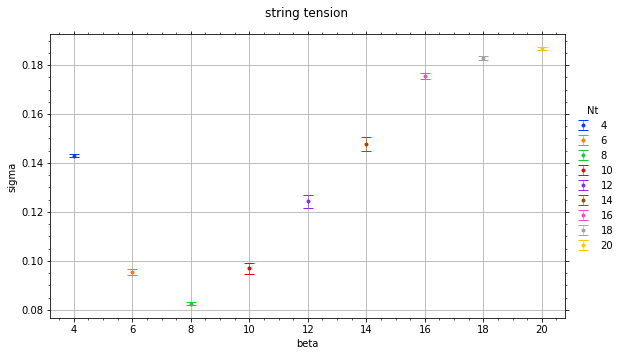

../../images/potential/su3/QCD/140MeV//string_tension_nt20


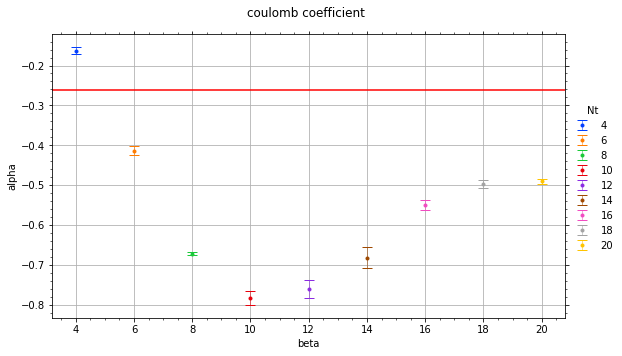

../../images/potential/su3/QCD/140MeV//coulomb_coefficient_nt20


In [55]:
show_plot = True
coordinate = 'r/a'
hue = 'Nt'
groupby = []
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt20/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 20, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (6, 6), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt18/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 18, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (6, 6), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt16/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 16, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (6, 6), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt14/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 14, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (6, 6), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt12/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 12, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (5, 5), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt10/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 10, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (4, 4), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt8/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 8, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (3, 3), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt6/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 6, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (2, 2), 'smearing_step': (26, 26)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/nt4/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'Nt': 4, 'potential_type': 'original'}, 'constraints': {'r/a': (1, 20), 'T': (1, 1), 'smearing_step': (26, 26)}}]
image_path = f'../../images/potential/su3/QCD/140MeV/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('smearing_step', axis = 1)
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (1, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
# data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (4, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (4, 32), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
# plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot)
#x_fit = np.linspace(6, 6.4, 1000)
#y_fit = scaler.get_a_sqrt_sigma(x_fit)
#df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
#df_string_tension_fit['fit'] = 'fit'
#fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'Nt', 'sigma', 'sigma_err', hue, 'beta', 'sigma', 'string tension', f'../../images/potential/su3/QCD/140MeV/', 'string_tension_nt20', show_plot)
plots.plot_potential_single(fit_params, 'Nt', 'alpha', 'alpha_err', hue, 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/QCD/140MeV/', 'coulomb_coefficient_nt20', show_plot,  black_line_y=-math.pi/12)

   copy  T  beta  size        V0    V0_err     alpha  alpha_err     sigma  \
0     0  6   6.0  16^4  0.157441  0.001300 -0.271760   0.002520  0.046645   
1     0  6   6.0  24^4  0.147759  0.007814 -0.258142   0.014623  0.048138   
2     0  6   6.0  32^4  0.146947  0.000768 -0.256103   0.001505  0.048411   

   sigma_err        chi_sq  
0   0.000159  1.631465e-07  
1   0.001002  1.416762e-02  
2   0.000093  1.861801e-05  
   copy  T  beta  size        V0    V0_err     alpha  alpha_err     sigma  \
0     0  6   6.0  16^4  0.157441  0.001300 -0.271760   0.002520  0.215974   
1     0  6   6.0  24^4  0.147759  0.007814 -0.258142   0.014623  0.219405   
2     0  6   6.0  32^4  0.146947  0.000768 -0.256103   0.001505  0.220025   

   sigma_err        chi_sq  
0   0.000367  1.631465e-07  
1   0.002282  1.416762e-02  
2   0.000210  1.861801e-05  


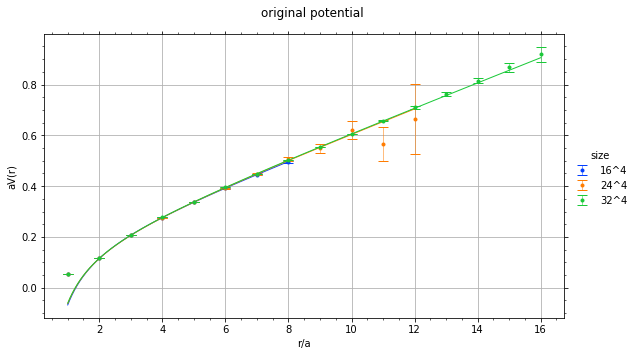

../../images/potential/su3/gluodynamics//size_comparison


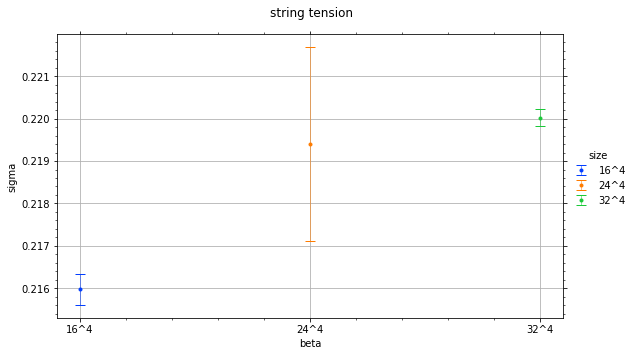

../../images/potential/su3/gluodynamics//string_tension_beta=6p0


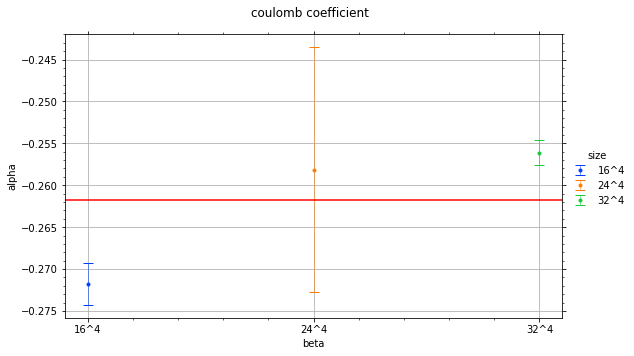

../../images/potential/su3/gluodynamics//coulomb_coefficient_beta=6p0


In [25]:
show_plot = True
coordinate = 'r/a'
hue = 'size'
groupby = []
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.0, 'size': '16^4'}, 'constraints': {'r/a': (1, 8), 'T': (6, 6)}},
          {'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/potential_original.csv',
          'parameters': {'beta': 6.0, 'size': '24^4'}, 'constraints': {'r/a': (1, 12), 'T': (6, 6), 'smearing_step': (13, 13)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.0, 'size': '32^4'}, 'constraints': {'r/a': (1, 16), 'T': (6, 6)}}]
# paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.8/smearing/potential_original.csv',
#           'parameters': {'beta': 6.0, 'size': '24^4'}, 'constraints': {'r/a': (1, 12), 'T': (6, 6), 'smearing_step': (10, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.drop('smearing_step', axis = 1)
# data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
# data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (3, 12), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (3, 12), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index(drop=True)
print(fit_params)
fit_params['sigma_err'] = fit_params['sigma_err']/(2*np.sqrt(fit_params['sigma']))
fit_params['sigma'] = np.sqrt(fit_params['sigma'])
# print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)
#x_fit = np.linspace(6, 6.4, 1000)
#y_fit = scaler.get_a_sqrt_sigma(x_fit)
#df_string_tension_fit = pd.DataFrame({'beta': x_fit, 'sigma': y_fit})
#df_string_tension_fit['fit'] = 'fit'
#fit_params['fit'] = 'fit'
plots.plot_potential_single(fit_params, 'size', 'sigma', 'sigma_err', hue, 'beta', 'sigma', 'string tension', f'../../images/potential/su3/gluodynamics/', 'string_tension_beta=6p0', show_plot)
plots.plot_potential_single(fit_params, 'size', 'alpha', 'alpha_err', hue, 'beta', 'alpha', 'coulomb coefficient', f'../../images/potential/su3/gluodynamics/', 'coulomb_coefficient_beta=6p0', show_plot,  black_line_y=-math.pi/12)

         beta  size        r/a     aV(r)
0    beta=6.0  24^4   1.000000  0.381979
1    beta=6.0  24^4   1.011011  0.386154
2    beta=6.0  24^4   1.022022  0.390249
3    beta=6.0  24^4   1.033033  0.394268
4    beta=6.0  24^4   1.044044  0.398213
..        ...   ...        ...       ...
995  beta=6.0  24^4  11.955956  1.198519
996  beta=6.0  24^4  11.966967  1.199055
997  beta=6.0  24^4  11.977978  1.199592
998  beta=6.0  24^4  11.988989  1.200129
999  beta=6.0  24^4  12.000000  1.200665

[1000 rows x 4 columns]
       beta  size        V0    V0_err     alpha  alpha_err     sigma  \
0  beta=6.0  24^4  0.679177  0.006382 -0.349226   0.014163  0.045581   

   sigma_err    chi_sq  
0   0.000545  0.000055  
0.2134962778954389


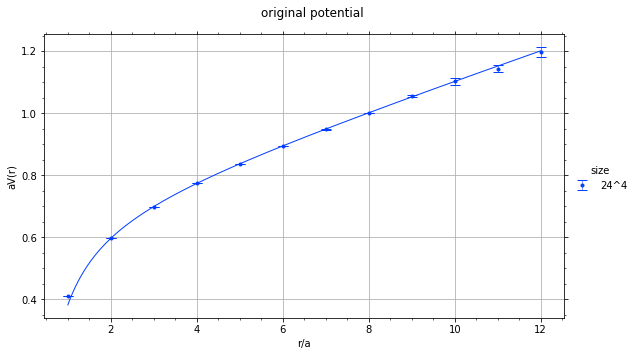

../../images/potential/su3/gluodynamics/beta6.0//size_comparison


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'size'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.0', 'size': '24^4'}, 'constraints': {'r/a': (1, 12), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/beta6.0/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
print(df_fit)
print(fit_params)
fit_params = fit_params.reset_index()
print(math.sqrt(fit_params.at[0, 'sigma']))
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

   index      beta     size        V0    V0_err     alpha  alpha_err  \
0      0  beta=6.2  32^3x64  0.645419  0.003120 -0.322844   0.007939   
1      0  beta=6.2     32^4  0.638481  0.001475 -0.310809   0.003753   

      sigma  sigma_err    chi_sq  
0  0.024667   0.000216  0.000045  
1  0.025398   0.000102  0.000012  
0.1593676579186971 0.0003197910388366388


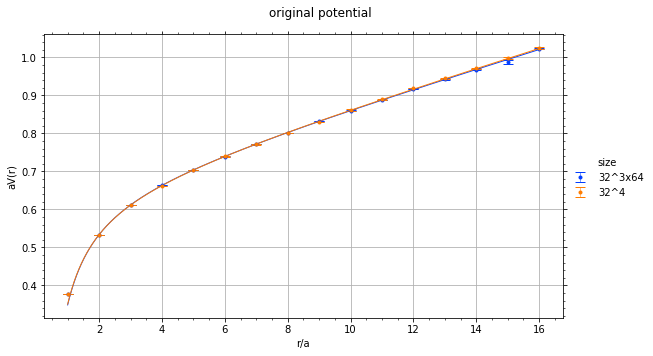

../../images/potential/su3/gluodynamics/beta6.2//size_comparison


In [9]:
show_plot = True
coordinate = 'r/a'
hue = 'size'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'size': '32^4'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'size': '32^3x64'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/beta6.2/'
image_name = f'size_comparison'
data = potential_data.get_potantial_df(paths)
data = data.groupby(list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])])).apply(fit.potential_fit_T, (2, 8)).reset_index(level=list(data.columns[~data.columns.isin(['T', 'aV(r)', 'err'])]))
data = data.drop('T', axis = 1)
df_fit = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.potential_fit_data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])]))
fit_params = data.groupby(list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).apply(fit.make_fit, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)\
                    .reset_index(level=list(data.columns[~data.columns.isin(['r/a', 'aV(r)', 'err'])])).reset_index()
print(fit_params)
print(math.sqrt(fit_params.at[1, 'sigma']), fit_params.at[1, 'sigma_err']/(2*math.sqrt(fit_params.at[1, 'sigma'])))
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'r/a', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

         V0    V0_err     alpha  alpha_err     sigma  sigma_err    chi_sq
0  0.638481  0.001475 -0.310809   0.003753  0.025398   0.000102  0.000012


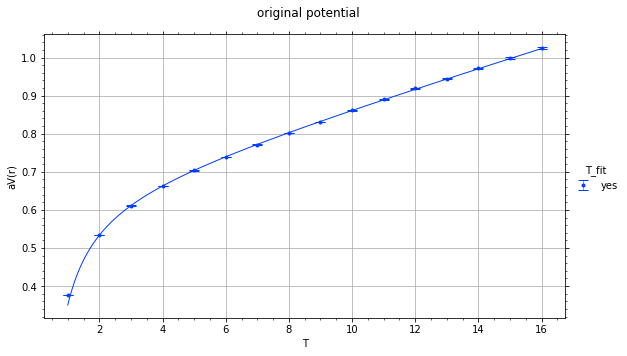

../../images/potential/su3/gluodynamics/32^4/beta6.2//potential_orignal


In [9]:
show_plot = True
coordinate = 'r/a'
hue = 'T_fit'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^4/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^4/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data = data.groupby('r/a').apply(fit.potential_fit_T, (2, 8)).reset_index(level='r/a')
data['T_fit'] = 'yes'
data['potential_type'] = 'original'
df_fit = fit.potential_fit_data(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')
df_fit['potential_type'] = 'original'
fit_params = fit.make_fit(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

         V0   V0_err     alpha  alpha_err     sigma  sigma_err    chi_sq
0  0.645419  0.00312 -0.322844   0.007939  0.024667   0.000216  0.000045


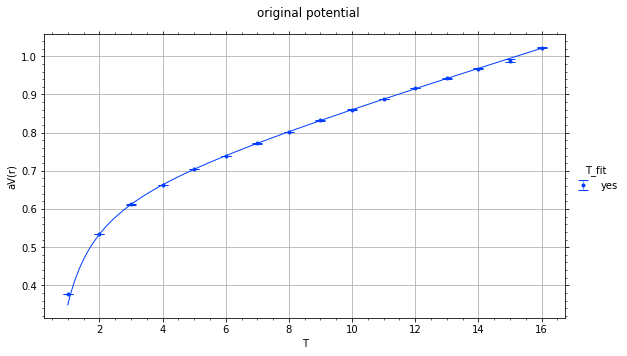

../../images/potential/su3/gluodynamics/32^3/beta6.2//potential_orignal


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'T_fit'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.2', 'potential_type': 'original', 'smearing': 'APE'}, 'constraints': {'r/a': (1, 16), 'T': (1, 10)}}]
image_path = f'../../images/potential/su3/gluodynamics/32^3x64/beta6.2/'
image_name = f'potential_orignal'
data = potential_data.get_potantial_df(paths)
data = data.groupby('r/a').apply(fit.potential_fit_T, (2, 8)).reset_index(level='r/a')
data['T_fit'] = 'yes'
data['potential_type'] = 'original'
df_fit = fit.potential_fit_data(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err')
df_fit['potential_type'] = 'original'
fit_params = fit.make_fit(data, (2, 16), fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col=None)
print(fit_params)
plots.plot_potential_single(data, coordinate, 'aV(r)', 'err', hue, 'T', 'aV(r)', 'original potential', image_path, image_name, show_plot, df_fits=df_fit)

In [10]:
# plot potential T dependence for each r
def plot_T_dependence(paths, image_path, show_plot, fit=None):
    data = potential_data.get_potantial_df(paths)
    data['fit'] = 'T_fit'
    if fit != None:
        df_fits = data.groupby('r/a').apply(fit.potential_fit_data, (2, 8), fit.func_exponent,['C', 'b', 'V'], 'T', 'aV(r)', err_col='err').reset_index(level='r/a')
        df_fits['fit'] = 'T_fit'
    for r in data['r/a'].unique():
        if fit == None:
            fit1 = None
        else:
            fit1 = df_fits[df_fits['r/a'] == r]
        plots.plot_potential_single(data[data['r/a'] == r], 'T', 'aV(r)', 'err', 'fit', 'T', 'aV(r)', 'original potential', image_path, f'potential_T_dependence_r={r}', show_plot, fit1)